# 1. 회귀 분석 Regression

* 독립변수 x로 종속변수 y를 예측하는 것을 의미

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# e-03같은 것들을 일반식 0.003으로 바꿔줌
np.set_printoptions(suppress=True)

In [ ]:
click = pd.read_csv('click.csv')
click

,x,y
0,235,591
1,216,539
2,148,413
3,35,310
4,85,308
5,204,519
6,49,325
7,25,332
8,173,498
9,191,498


* x = 광고 비용
* y = 클릭수

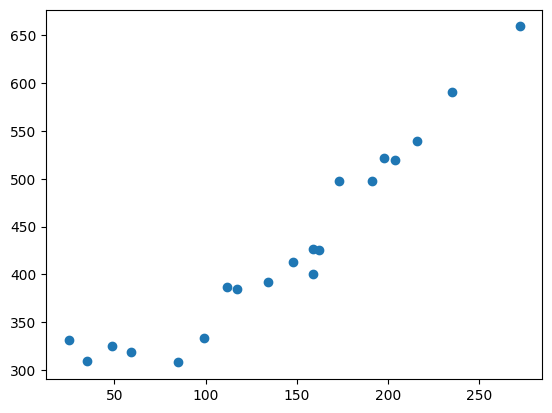

In [ ]:
plt.plot(click.x, click.y, 'o')

### 2-1 MSE (Mean Squared Error)
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값
* ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

### 2-2  MAE (Mean Absolute Error)
* 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값
* $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$
* 잘 안씀; 왜냐면 나중에 절대값이 미분적분이 어려워서

### 2-3 RSME (Root Mean Squared Error)
* 예측값과 실제값의 차이에 대하여 제곱에 대하여 평균을 낸 후 루트를 씌운 값
* $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [ ]:
pred = np.array([3,4,5])
actual = np.array([1,2,3])

In [ ]:
def my_mse(pred, actual):
  return ((pred - actual)**2).mean()

In [ ]:
my_mse(pred,actual)

4.0

In [ ]:
def my_mae (pred, actual):
  return (np.abs(pred-actual).mean())

In [ ]:
my_mae (pred,actual)

2.0

In [ ]:
def my_rsme(pred,actual):
  return (np.sqrt(my_mse(pred,actual)))

In [ ]:
my_rsme(pred,actual)

2.0

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
my_mae(pred,actual), mean_absolute_error(pred,actual)

(2.0, 2.0)

In [ ]:
my_mse(pred,actual), mean_squared_error(pred,actual)

(4.0, 4.0)

In [ ]:
# from sklearn.datasets import load_boston

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
target = boston.values[1::2,2]

In [ ]:
boston.rename(columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO'}, inplace=True)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     1012 non-null   float64
 1   ZN       1012 non-null   float64
 2   INDUS    1012 non-null   float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


In [ ]:
boston = boston.dropna(axis=0)
boston.shape

(506, 11)

In [ ]:
boston['MEDV'] = target # 자가 주택의 중앙값
boston.head()

<ipython-input-19-fd2368b1cd05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston['MEDV'] = target # 자가 주택의 중앙값


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21.6
4,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34.7
6,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33.4
8,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36.2


In [ ]:
# 보스톤 집가격 데이터셋 학습용(0.8), 검즘용(2)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston.drop('MEDV', 1), boston.MEDV, test_size=0.2, random_state=333)

<ipython-input-20-a9aca8e7c62c>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(boston.drop('MEDV', 1), boston.MEDV, test_size=0.2, random_state=333)


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 11), (102, 11), (404,), (102,))

# 3. 모델별 성능 확인을 위한 함수 만들기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)

  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_predictions
  global colors

  plot_predictions(name_, pred, actual)

  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse

  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)

  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10

  length = len(df)

  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])

  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)

  plt.show()

# 4. Linear Regression

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(n_jobs=-1)
# hyperparameter란? LinearRegression안에 들어갈 parameter
# 이 hyperparameter을 어떻게 설정하느냐에 따라서 알고리즘의 성향이 달라짐
# n_jbos는 parameter중 하나이고, 위의 다큐먼트에 들어가서 알맞은 parameter를 골라서 씀
# -1은 CPU코어를 모두 사용

In [ ]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
pred = model.predict(x_test)

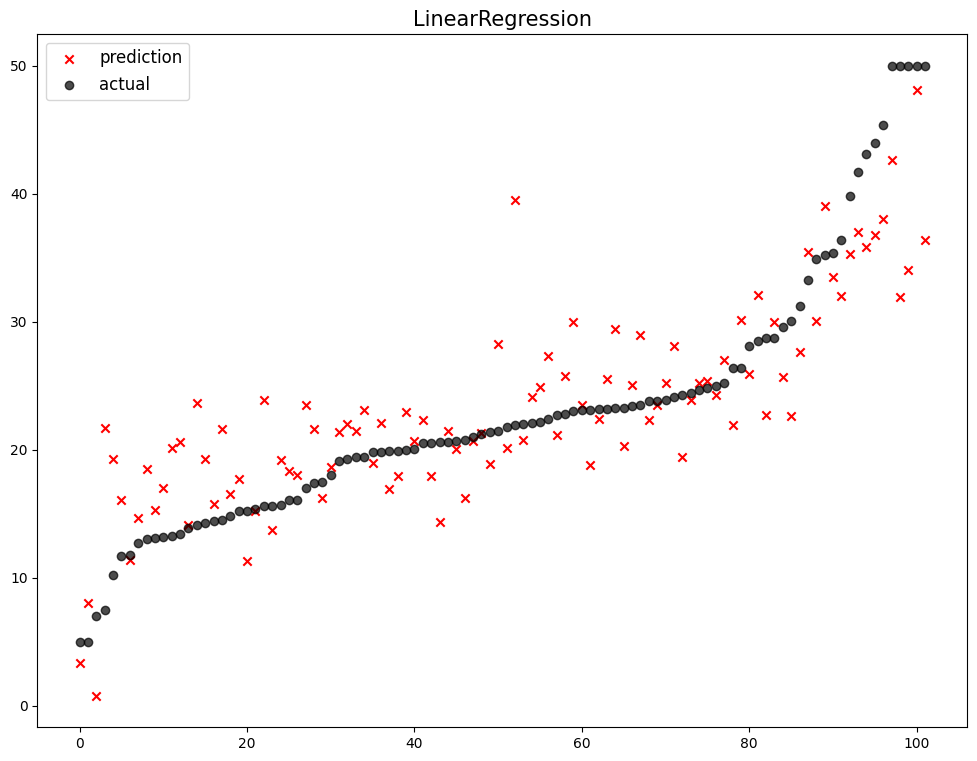

              model        mse
0  LinearRegression  28.052198


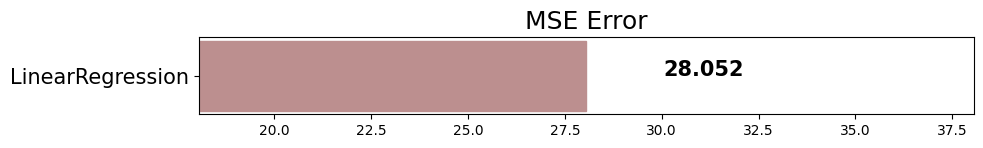

In [ ]:
# 여기서 name은 어떤 모델을 썻냐
mse_eval('LinearRegression', pred, y_test)

# 5. 규제 Regularization

* 학습이 overfitting 되는 것을 방지하고자 일종의 패널티를 부여하는 것
* Overfitting: 학습 데이터에만 존재하는 특징(노이즈)들이 과하게 모델에 반영되어 손실함수가 필요 이상으로 작아지게 되는 경우. 모델이 학습에 사용된 데이터만 잘 설명하고 데이터의 일반적인 특징을 반영하지 못한 현상

### 5-1 L1 규제: Lasso
* L1 규제 Lasso: 기존 Cost function (손실함수)에 가중치를 절대값의 합을 더하는 형태로, 미분시 weight의 크기에 상관없이 부호에 따라 일정ㄹ한 상수값을 빼거나 더함
* 특정 weight들을 0으로 만들 수 있어 원하는 weight만 남길 수 있는 feature selection 역할을 할 수 있음
  * y값에 미치는 영향이 미비하다면 특정 $x_n$ 들에 weight를 0으로 부여함
  * 원하는 weight만 남기면서 통제
* 특정 가중치를 삭제해 모델의 복잡도를 낮출 수 있음

### 5-2 L2 규제: Ridge
* Ridge는 기존 Cost Function에 가중치 제곱의 합을 더하는 형태로, weight의 크기에 따라 weight 값이 큰 값을 더 빠르게 감소시키는 weight decay 기법
* weight의 크기에 따라 가중치 패널티 정도가 달라지기 때문에 가중치가 전반적으로 작아져서 학습 효과가 L1 대비 더 좋게 나타남
  * y값에 미치는 영향에 따라 $x_n$ 들에 특정 weight들을 부여함
  * 그러함으로써 우리가 각각의 variable에 대한 weight를 통제

> 실제 최적값에 대한 bias에 대한 손해를 보더라도 variance를 낮춰서 overfitting 발생을 낮추는 것

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

* coef_ : LinearRegression은 사이킷런의 선형회귀 클래스임.학습된 모델의 coef_ 속성 feature은 특성/가중치에 대한 계수를 포함한 배열(배열의 크기는 특성의 갯수와 같음)

### 5-3. Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# alpha = 규제 강도; 얼마나 쎄게 규제를 줄건지
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

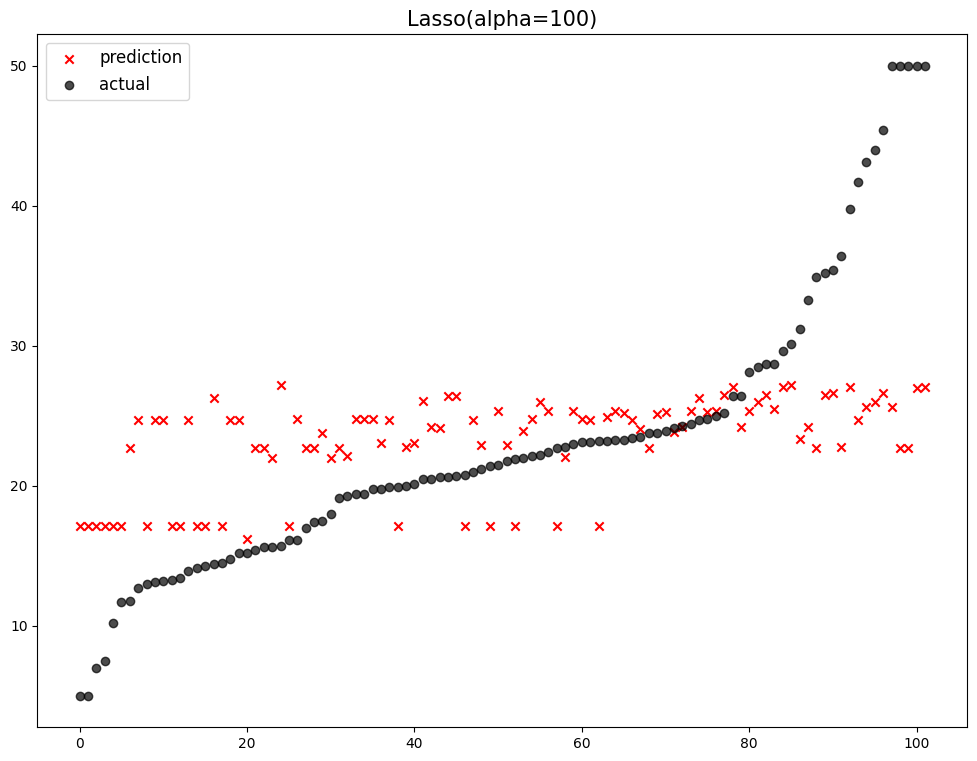

              model        mse
0  Lasso(alpha=100)  76.902047
1  LinearRegression  28.052198


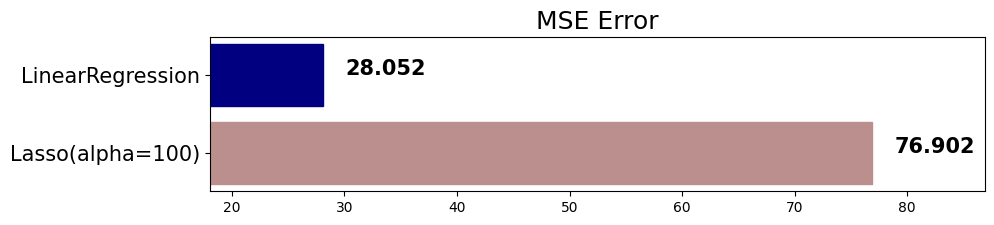

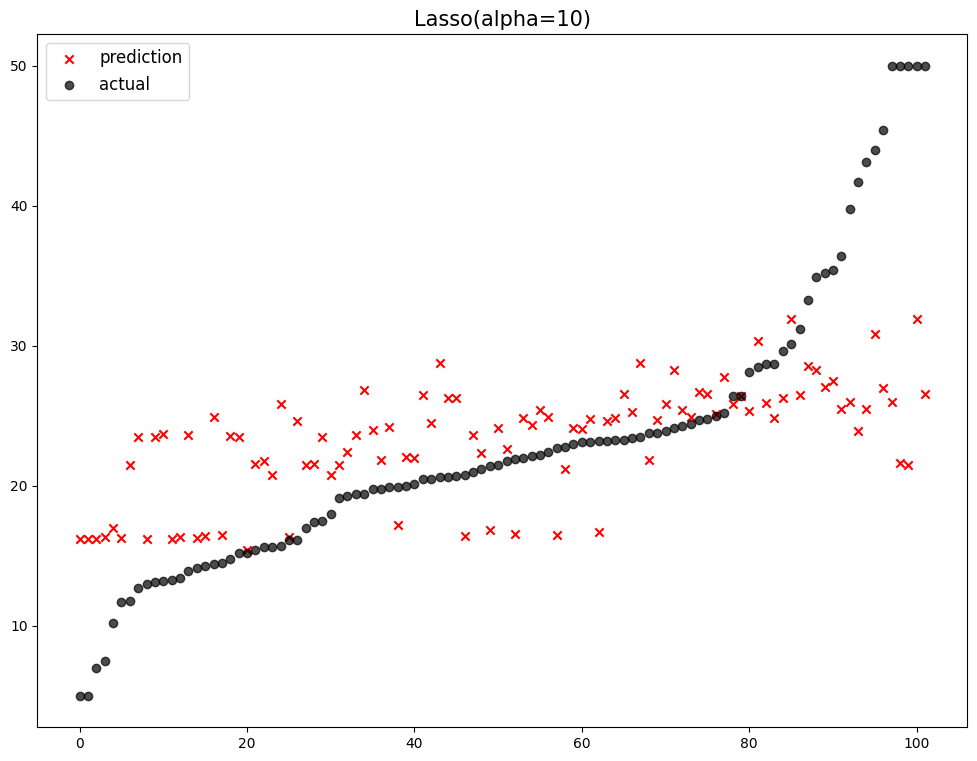

              model        mse
0  Lasso(alpha=100)  76.902047
1   Lasso(alpha=10)  69.239114
2  LinearRegression  28.052198


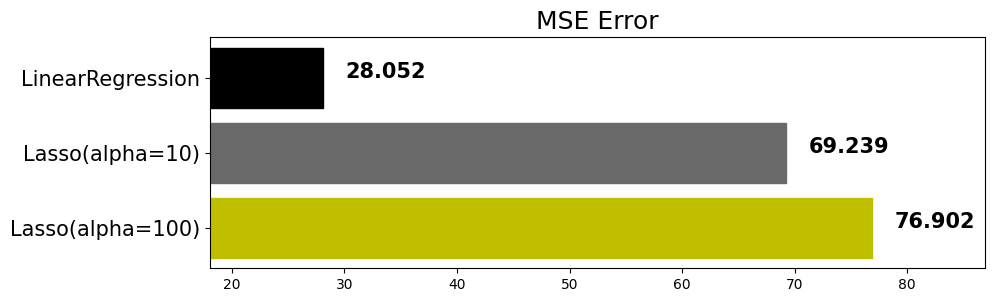

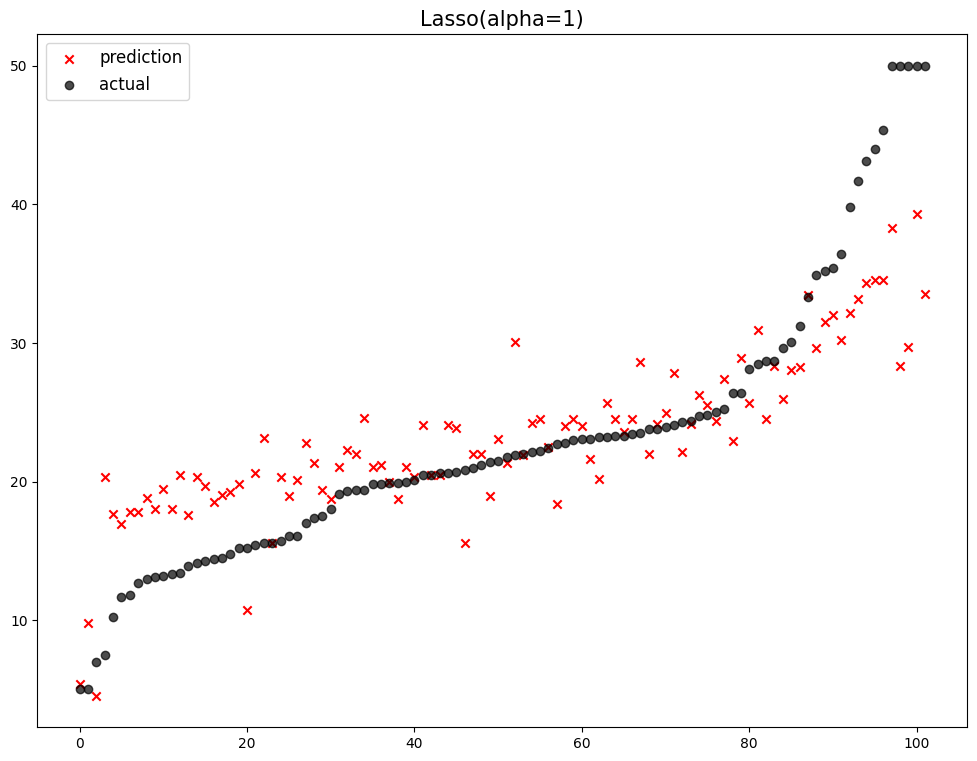

              model        mse
0  Lasso(alpha=100)  76.902047
1   Lasso(alpha=10)  69.239114
2    Lasso(alpha=1)  30.916750
3  LinearRegression  28.052198


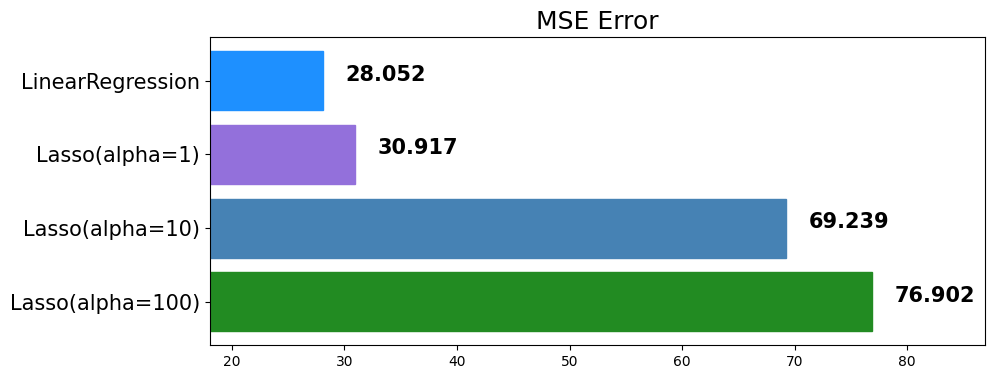

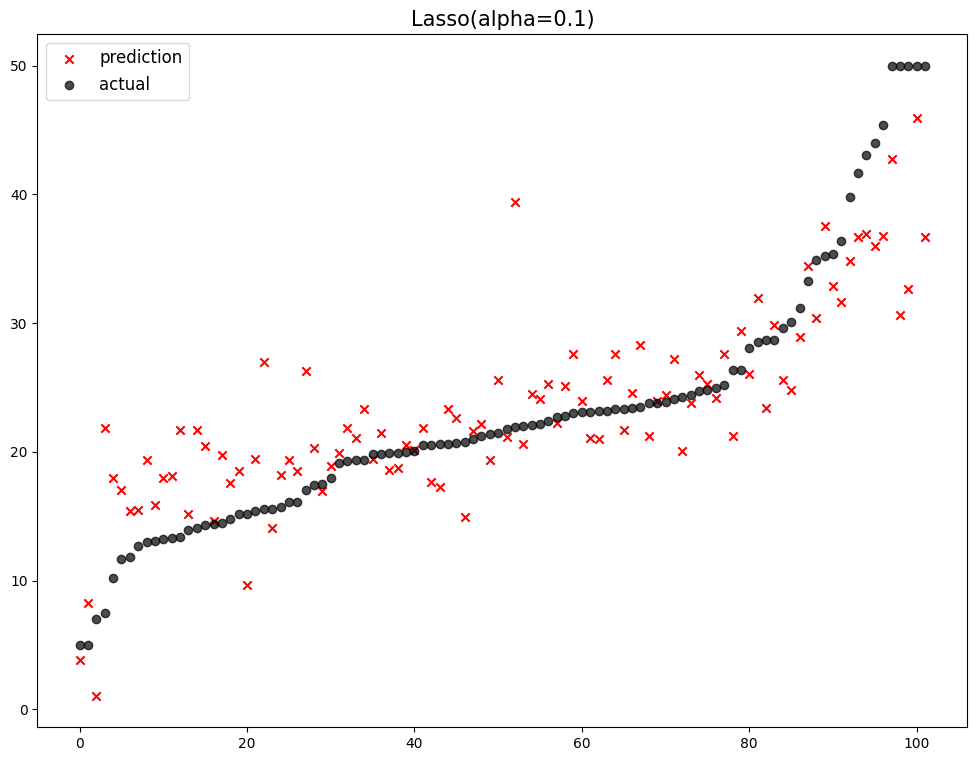

              model        mse
0  Lasso(alpha=100)  76.902047
1   Lasso(alpha=10)  69.239114
2    Lasso(alpha=1)  30.916750
3  Lasso(alpha=0.1)  28.240782
4  LinearRegression  28.052198


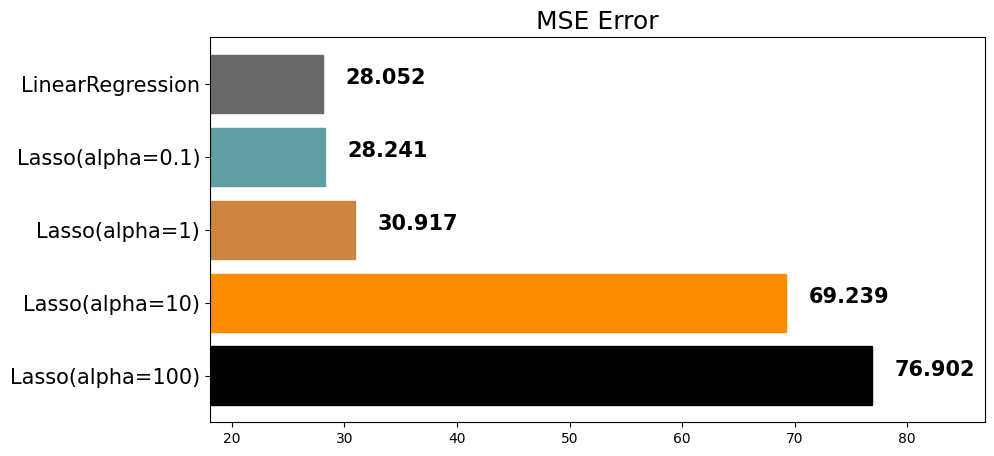

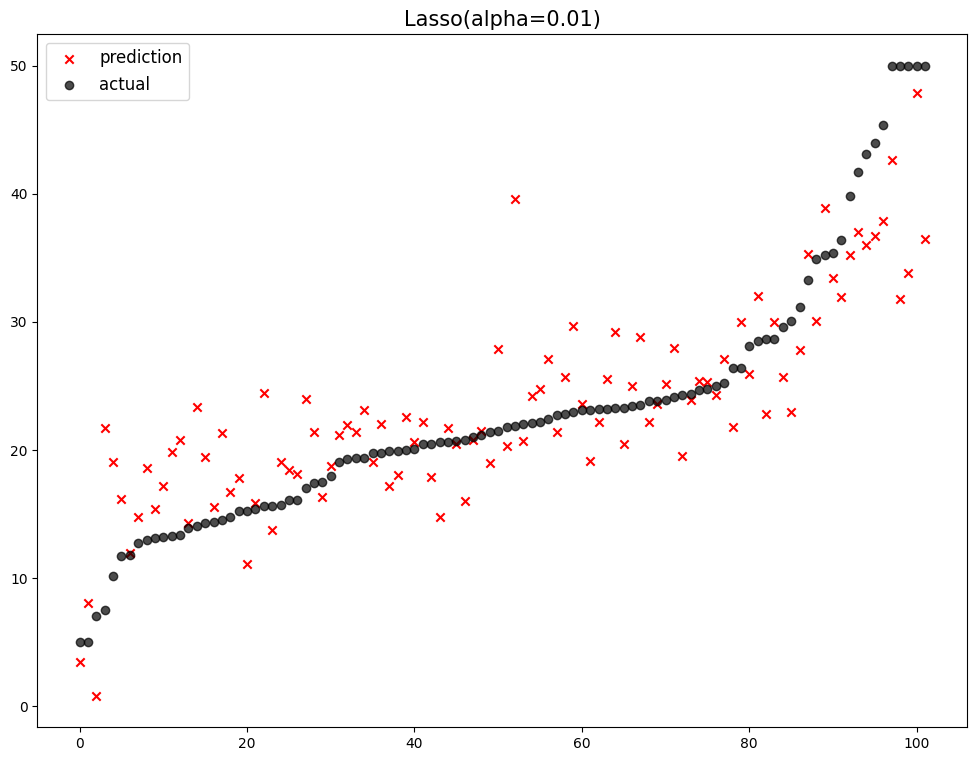

               model        mse
0   Lasso(alpha=100)  76.902047
1    Lasso(alpha=10)  69.239114
2     Lasso(alpha=1)  30.916750
3   Lasso(alpha=0.1)  28.240782
4   LinearRegression  28.052198
5  Lasso(alpha=0.01)  27.947338


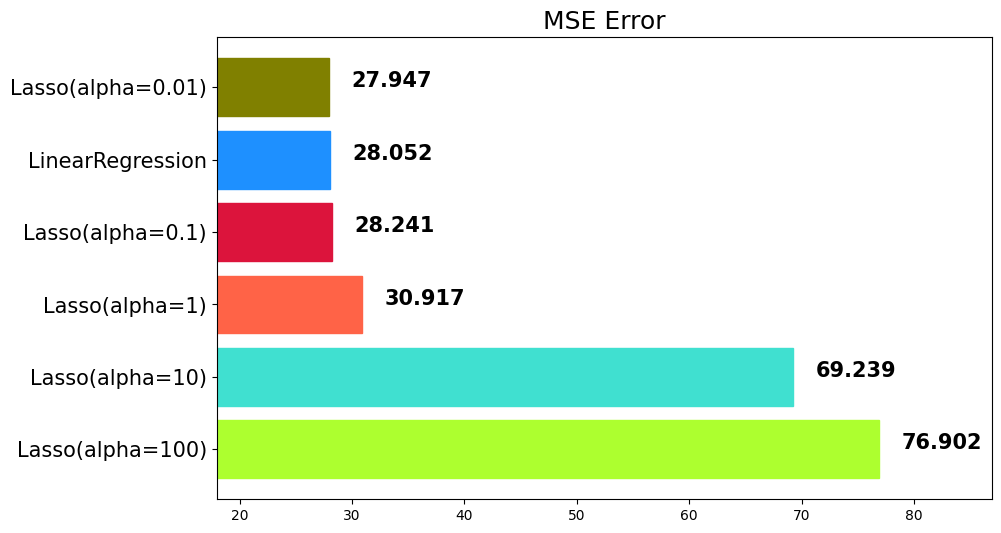

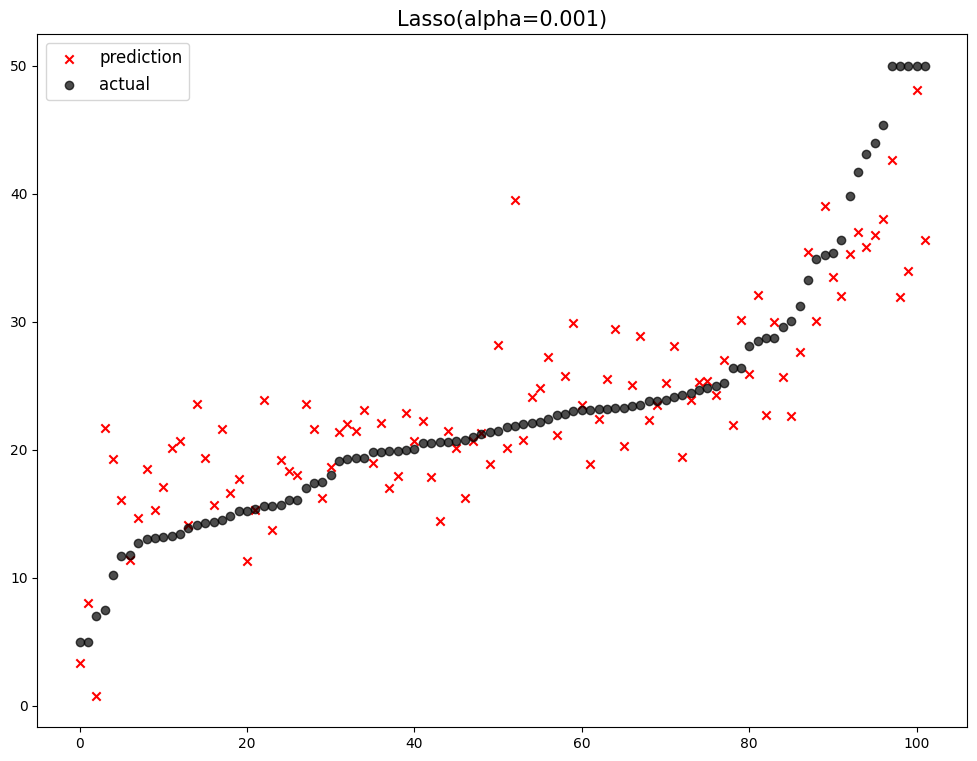

                model        mse
0    Lasso(alpha=100)  76.902047
1     Lasso(alpha=10)  69.239114
2      Lasso(alpha=1)  30.916750
3    Lasso(alpha=0.1)  28.240782
4    LinearRegression  28.052198
5  Lasso(alpha=0.001)  28.038362
6   Lasso(alpha=0.01)  27.947338


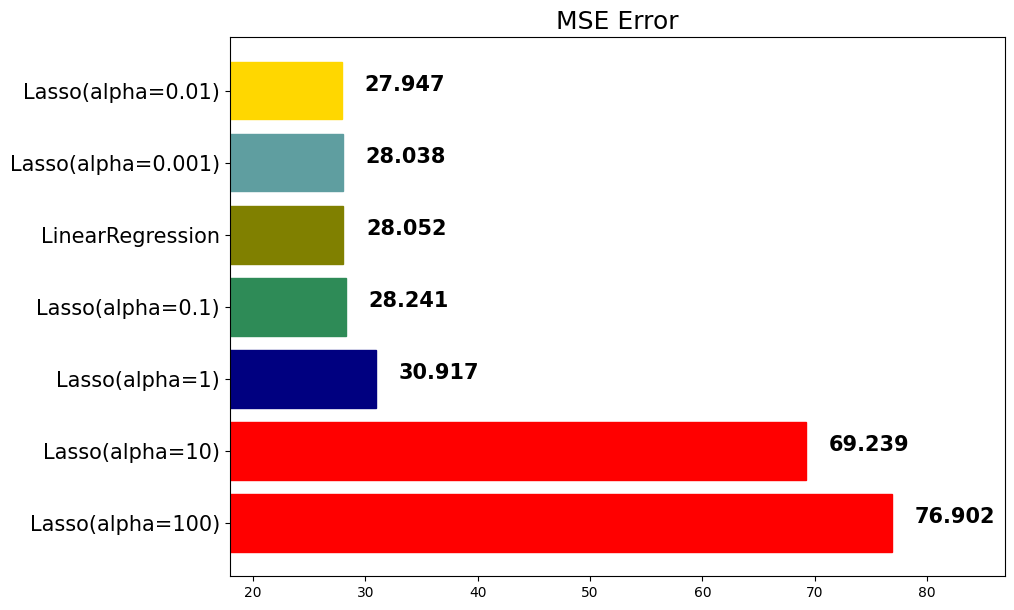

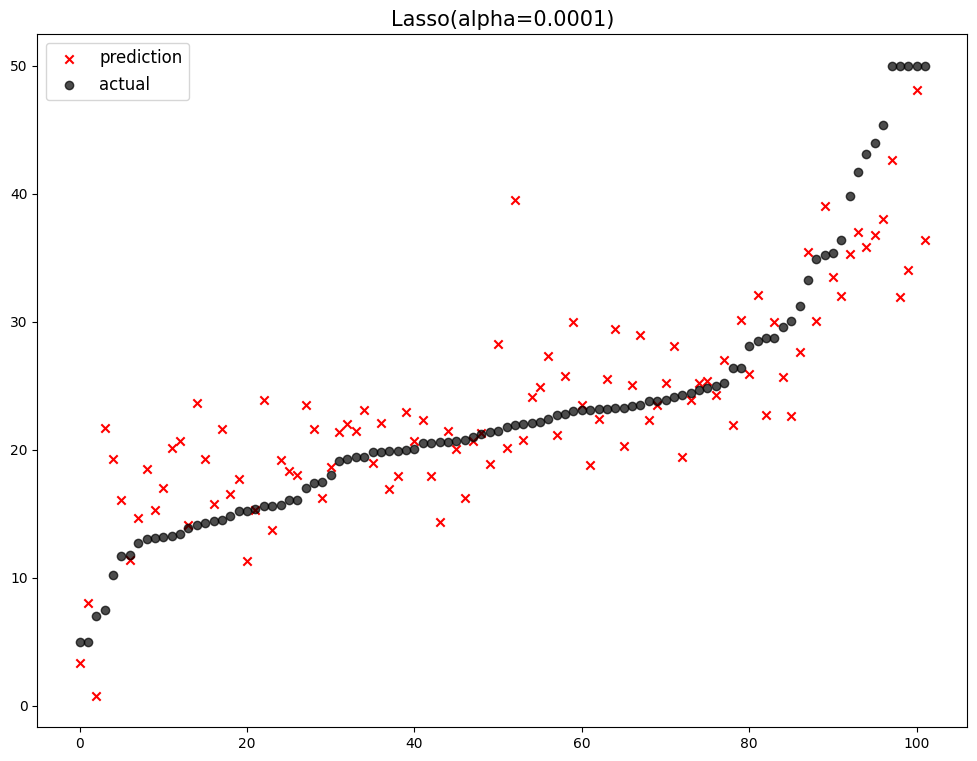

                 model        mse
0     Lasso(alpha=100)  76.902047
1      Lasso(alpha=10)  69.239114
2       Lasso(alpha=1)  30.916750
3     Lasso(alpha=0.1)  28.240782
4     LinearRegression  28.052198
5  Lasso(alpha=0.0001)  28.050781
6   Lasso(alpha=0.001)  28.038362
7    Lasso(alpha=0.01)  27.947338


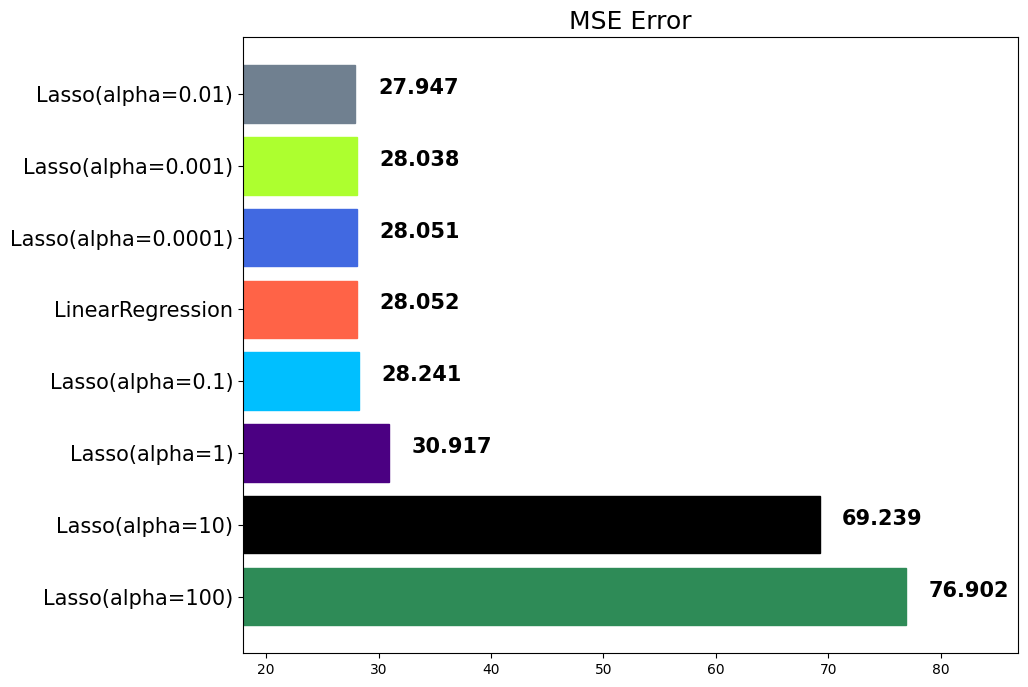

In [ ]:
# 일곱개의 alpha가 어떻게 다른지 확인
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(x_train, y_train)
  pred = lasso.predict(x_test)
  mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

> 규제가 없으면 없을수록 MSE error가 줄어듬. 잘 맞는다는 이야기일 수도 있지만 overfitting이라는 이야기도 됨.
> 실제 best alpha는 더 확인이 필요함

In [ ]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_100_pred = lasso_100.predict(x_test)

lasso_0001 = Lasso(alpha=0.001)
lasso_0001.fit(x_train, y_train)
lasso_0001_pred = lasso_0001.predict(x_test)

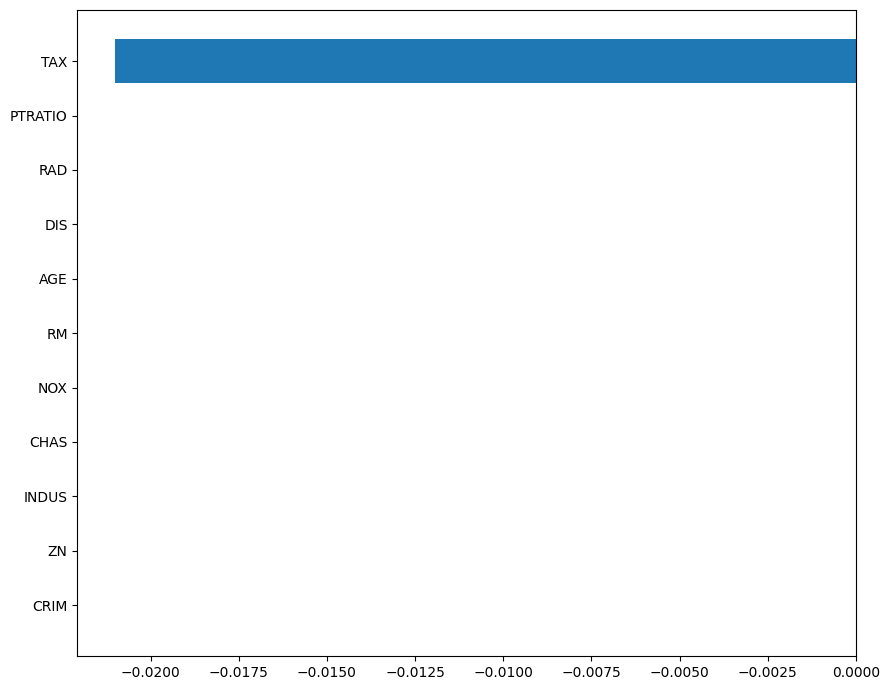

In [ ]:
plot_coef(x_train.columns, lasso_100.coef_)

> 쓸데없는 variable들의 weight들을 거의 소멸시킴. 그래서 tax에 의해서만 y값이 결정됨

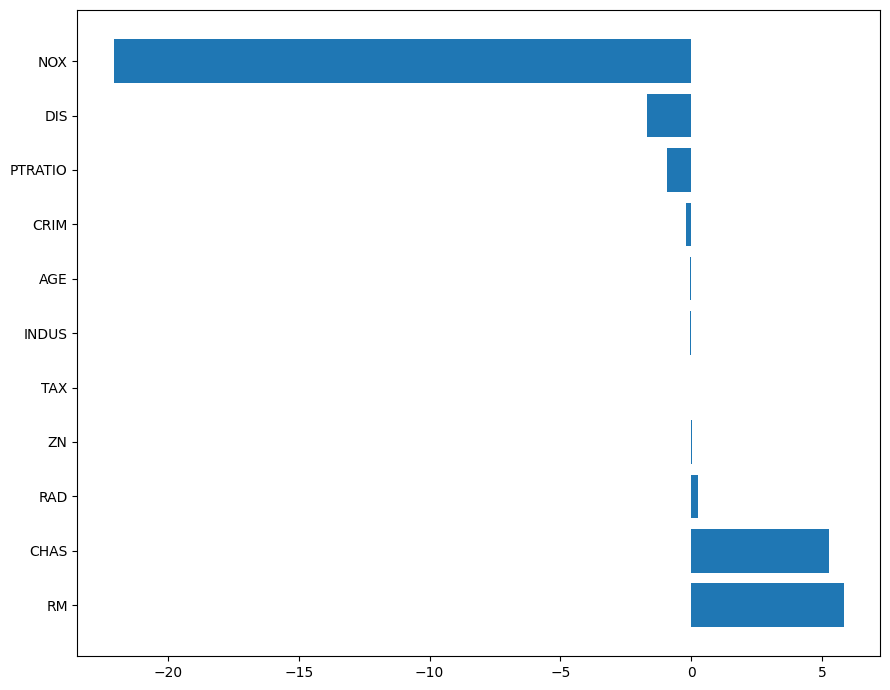

In [ ]:
plot_coef(x_train.columns, lasso_0001.coef_)

> weight가 소멸되는 정도가 100에 비해서 0.001이 덜한 것을 확인할 수 있음

### 5-4 Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

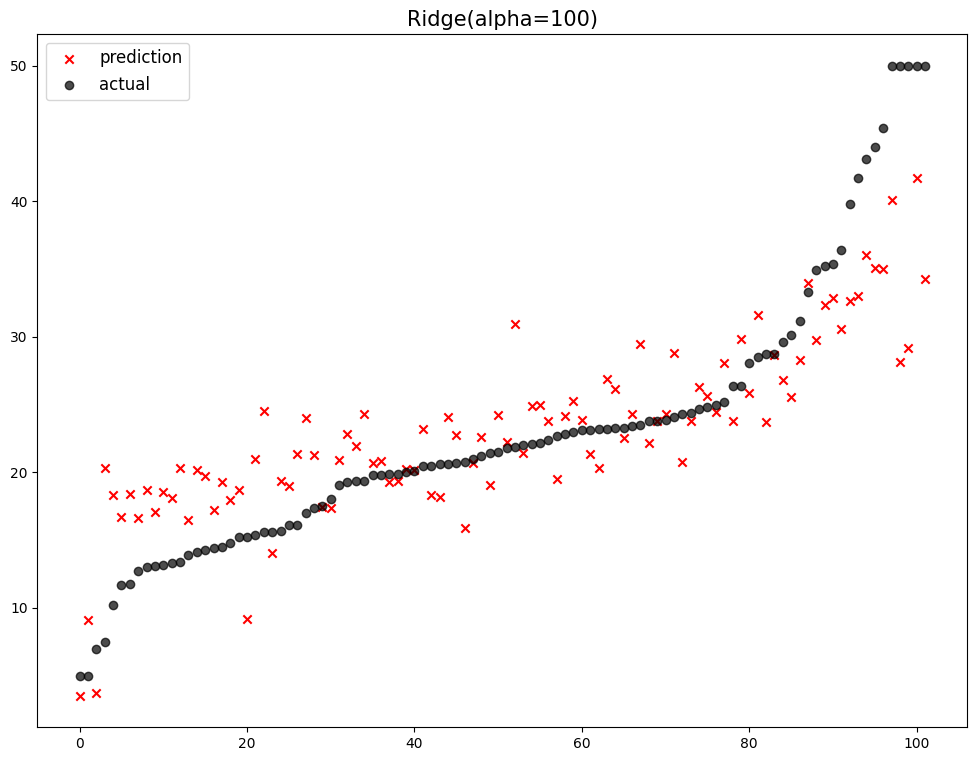

                 model        mse
0     Lasso(alpha=100)  76.902047
1      Lasso(alpha=10)  69.239114
2       Lasso(alpha=1)  30.916750
3     Ridge(alpha=100)  30.446370
4     Lasso(alpha=0.1)  28.240782
5     LinearRegression  28.052198
6  Lasso(alpha=0.0001)  28.050781
7   Lasso(alpha=0.001)  28.038362
8    Lasso(alpha=0.01)  27.947338


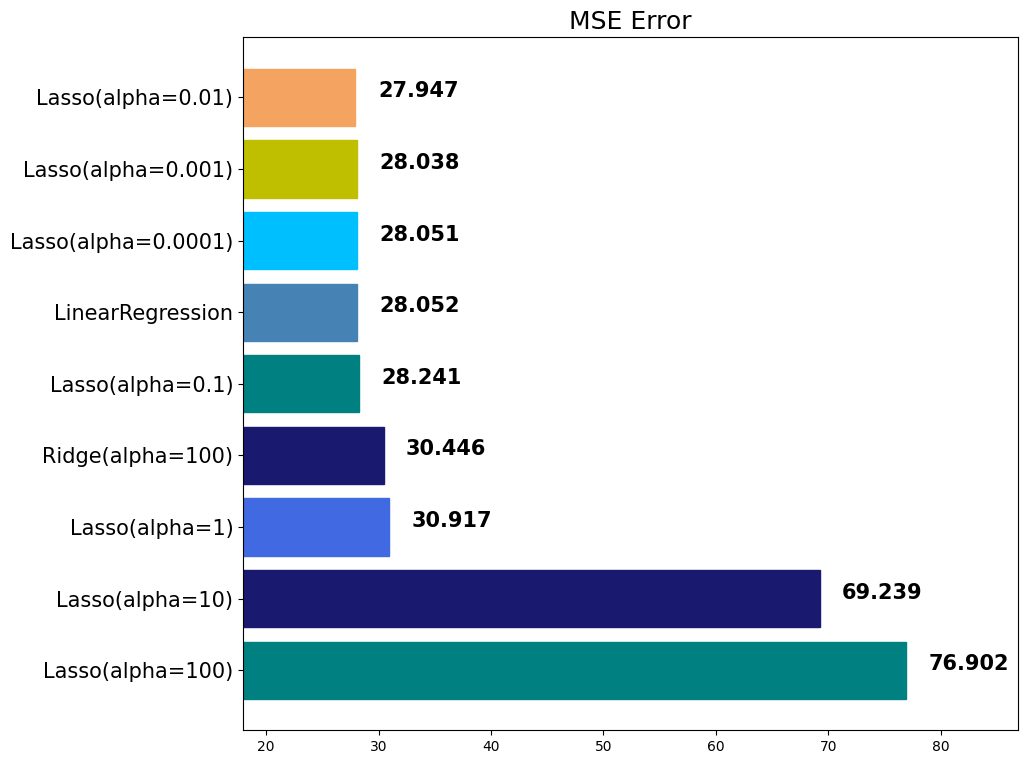

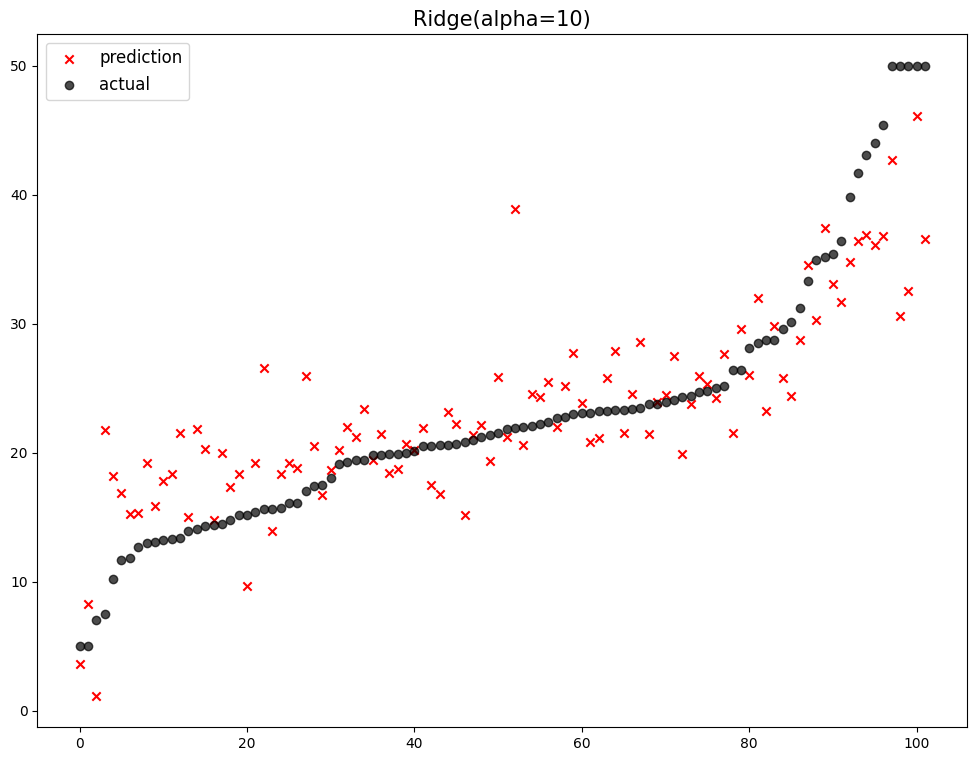

                 model        mse
0     Lasso(alpha=100)  76.902047
1      Lasso(alpha=10)  69.239114
2       Lasso(alpha=1)  30.916750
3     Ridge(alpha=100)  30.446370
4     Lasso(alpha=0.1)  28.240782
5      Ridge(alpha=10)  28.119283
6     LinearRegression  28.052198
7  Lasso(alpha=0.0001)  28.050781
8   Lasso(alpha=0.001)  28.038362
9    Lasso(alpha=0.01)  27.947338


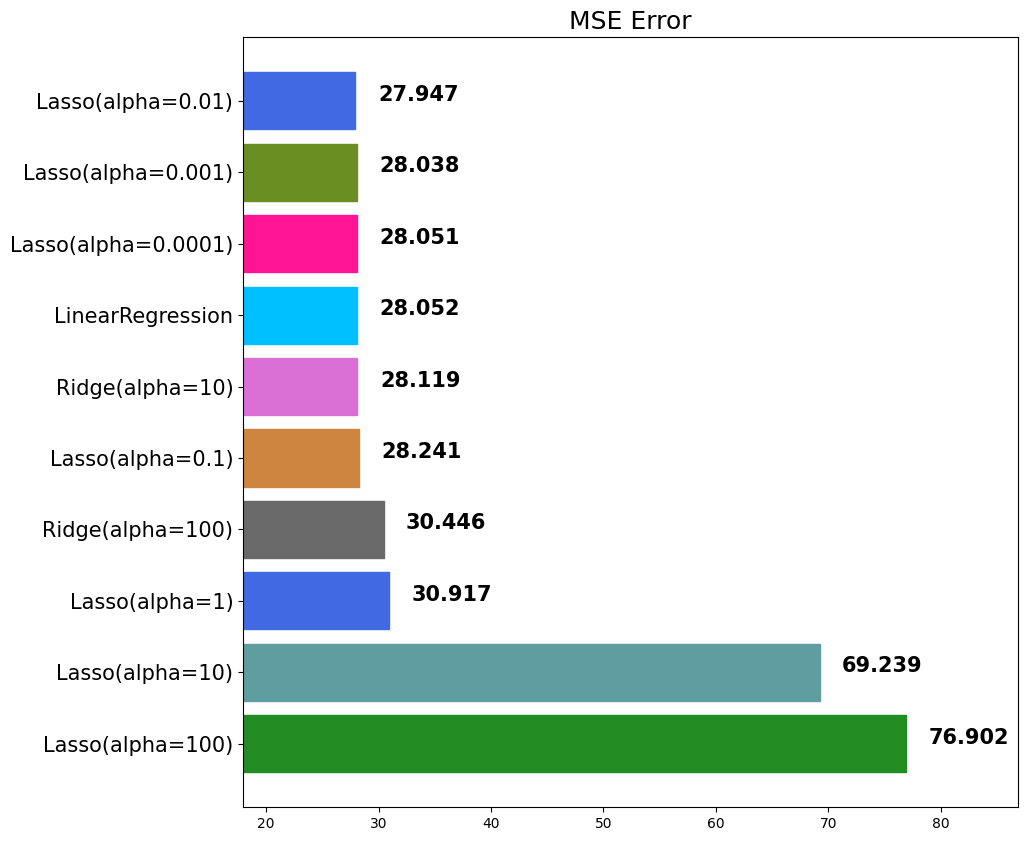

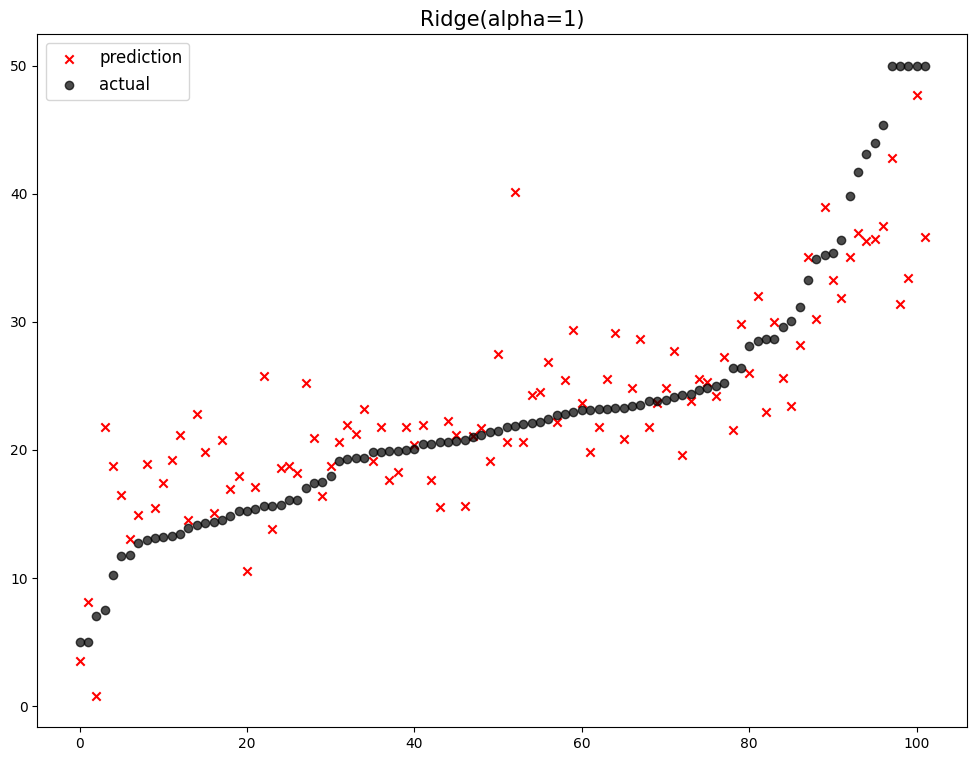

                  model        mse
0      Lasso(alpha=100)  76.902047
1       Lasso(alpha=10)  69.239114
2        Lasso(alpha=1)  30.916750
3      Ridge(alpha=100)  30.446370
4        Ridge(alpha=1)  28.290882
5      Lasso(alpha=0.1)  28.240782
6       Ridge(alpha=10)  28.119283
7      LinearRegression  28.052198
8   Lasso(alpha=0.0001)  28.050781
9    Lasso(alpha=0.001)  28.038362
10    Lasso(alpha=0.01)  27.947338


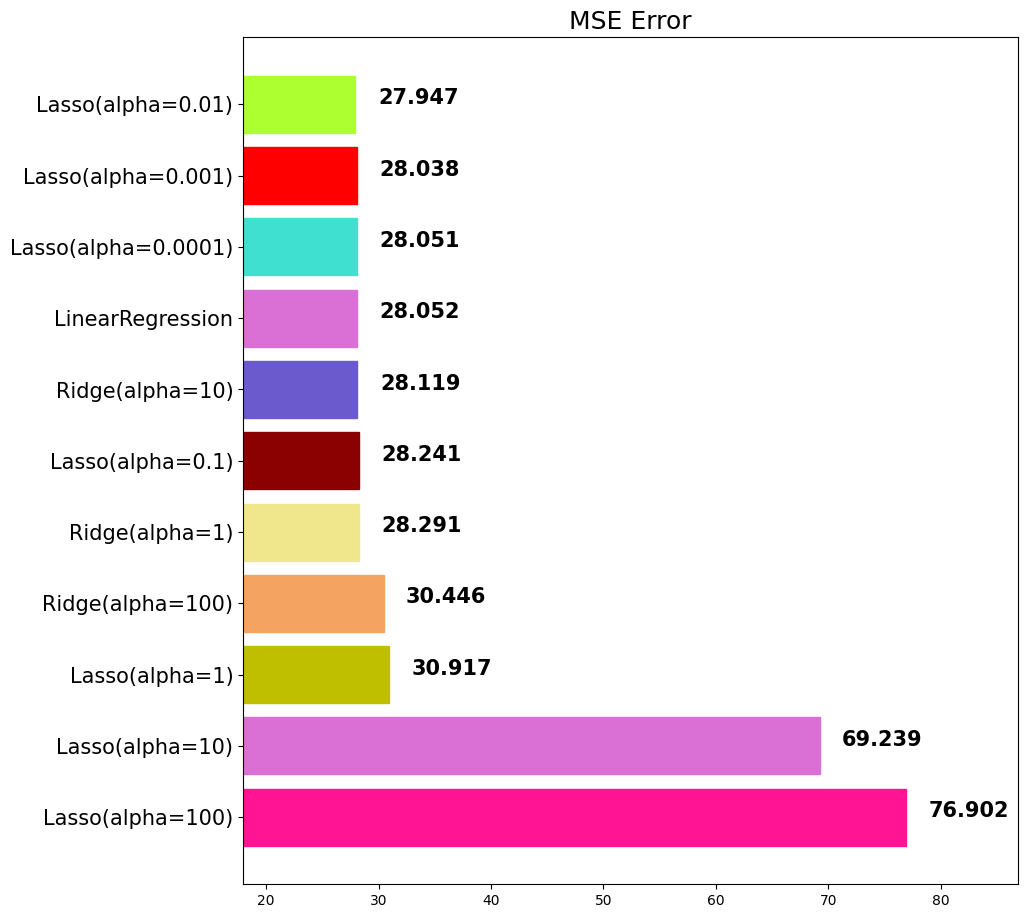

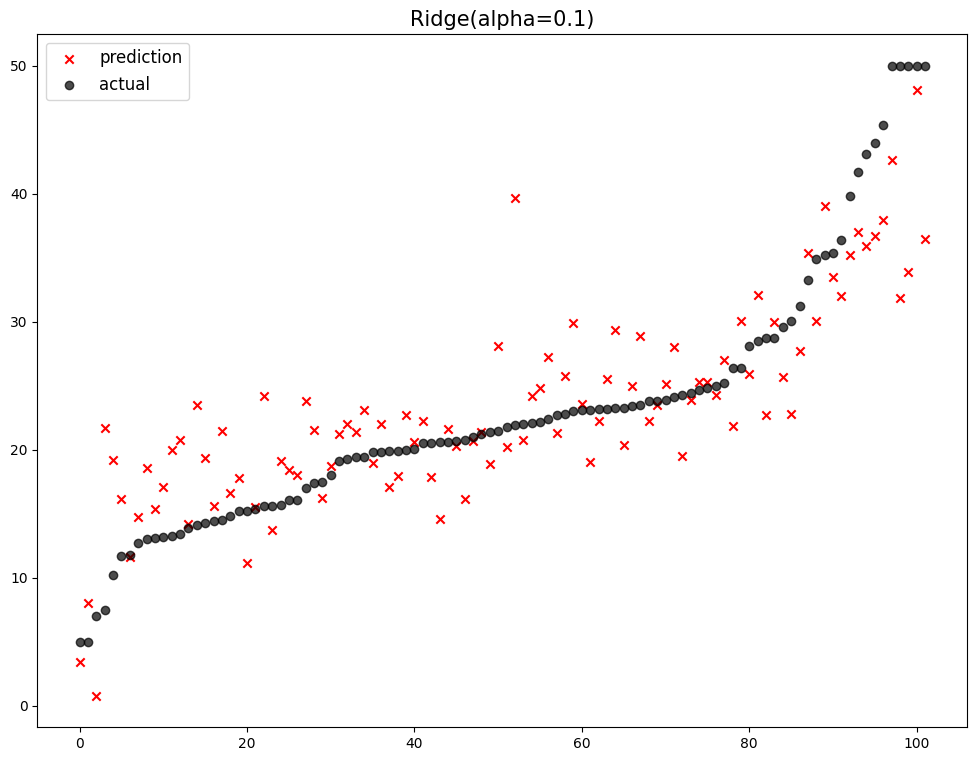

                  model        mse
0      Lasso(alpha=100)  76.902047
1       Lasso(alpha=10)  69.239114
2        Lasso(alpha=1)  30.916750
3      Ridge(alpha=100)  30.446370
4        Ridge(alpha=1)  28.290882
5      Lasso(alpha=0.1)  28.240782
6       Ridge(alpha=10)  28.119283
7      Ridge(alpha=0.1)  28.059207
8      LinearRegression  28.052198
9   Lasso(alpha=0.0001)  28.050781
10   Lasso(alpha=0.001)  28.038362
11    Lasso(alpha=0.01)  27.947338


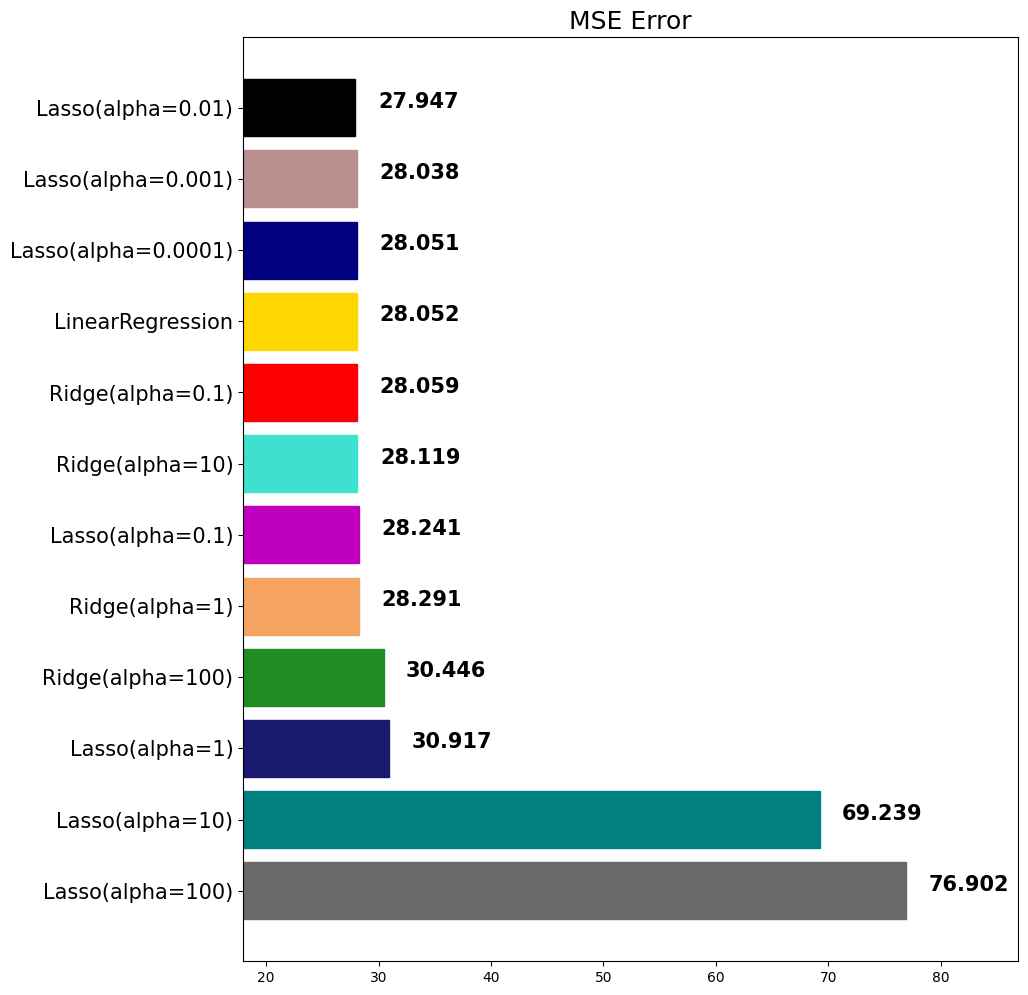

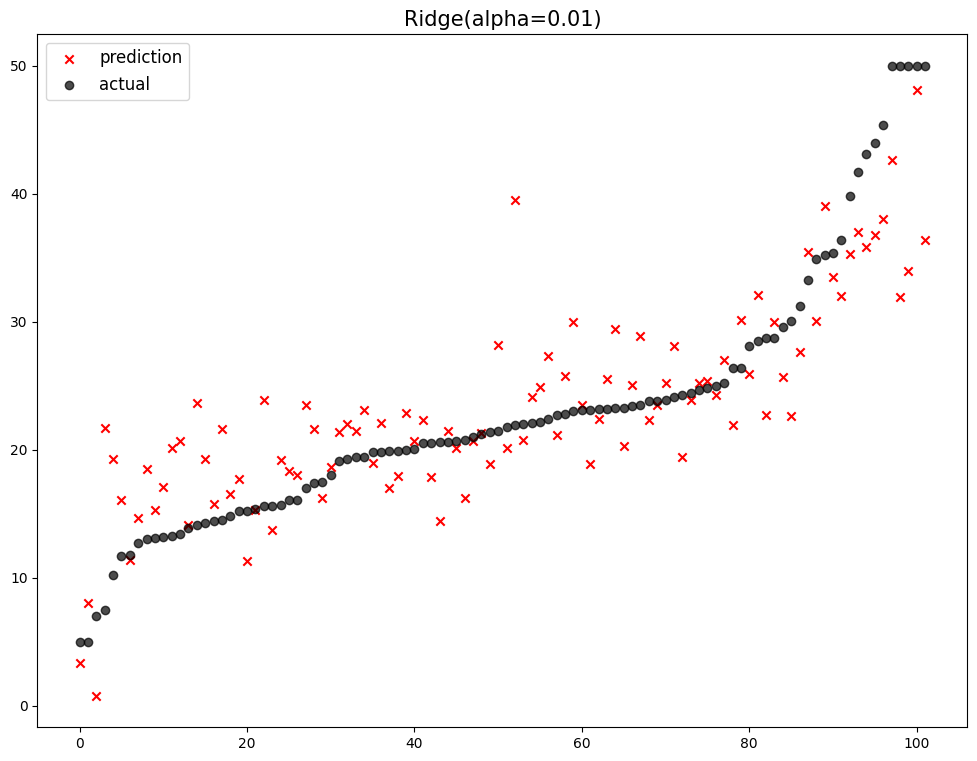

                  model        mse
0      Lasso(alpha=100)  76.902047
1       Lasso(alpha=10)  69.239114
2        Lasso(alpha=1)  30.916750
3      Ridge(alpha=100)  30.446370
4        Ridge(alpha=1)  28.290882
5      Lasso(alpha=0.1)  28.240782
6       Ridge(alpha=10)  28.119283
7      Ridge(alpha=0.1)  28.059207
8      LinearRegression  28.052198
9     Ridge(alpha=0.01)  28.052171
10  Lasso(alpha=0.0001)  28.050781
11   Lasso(alpha=0.001)  28.038362
12    Lasso(alpha=0.01)  27.947338


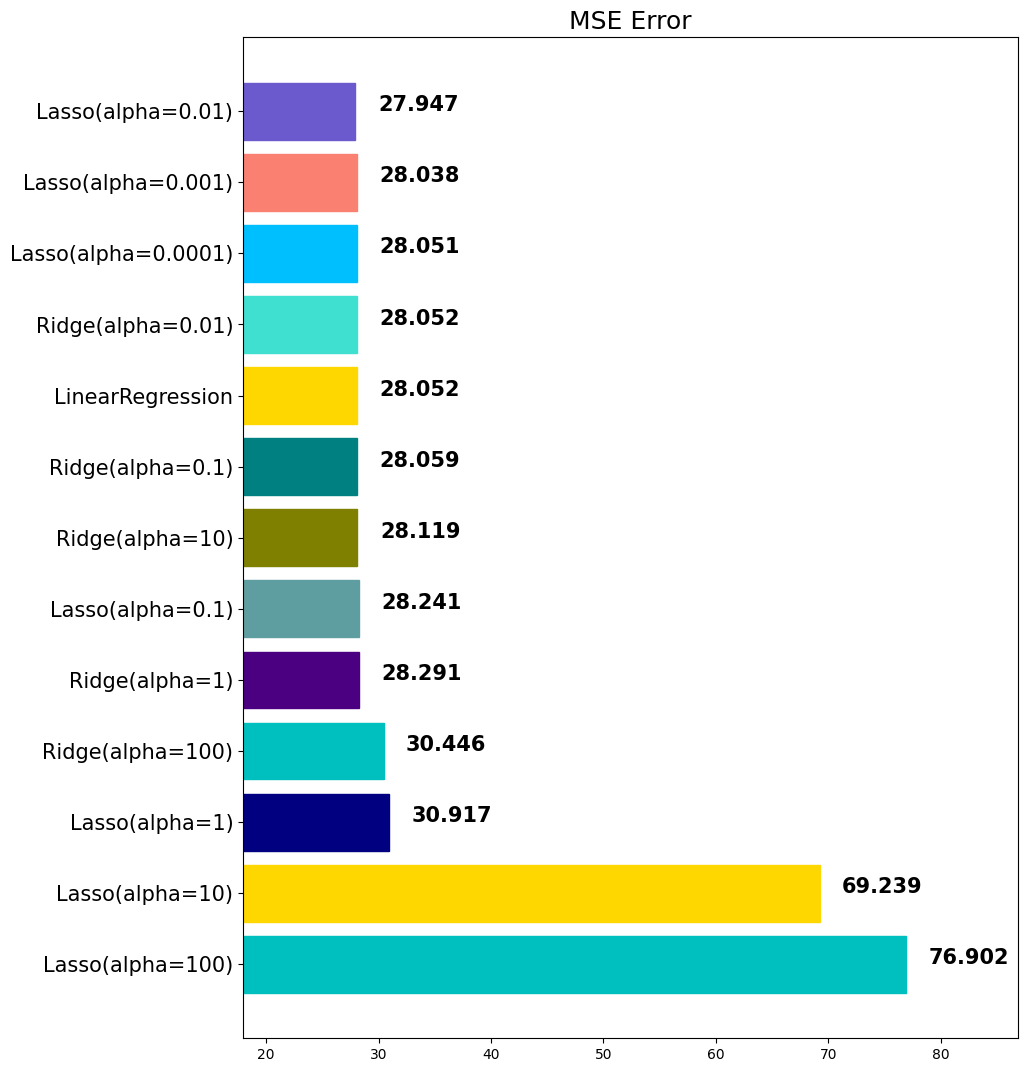

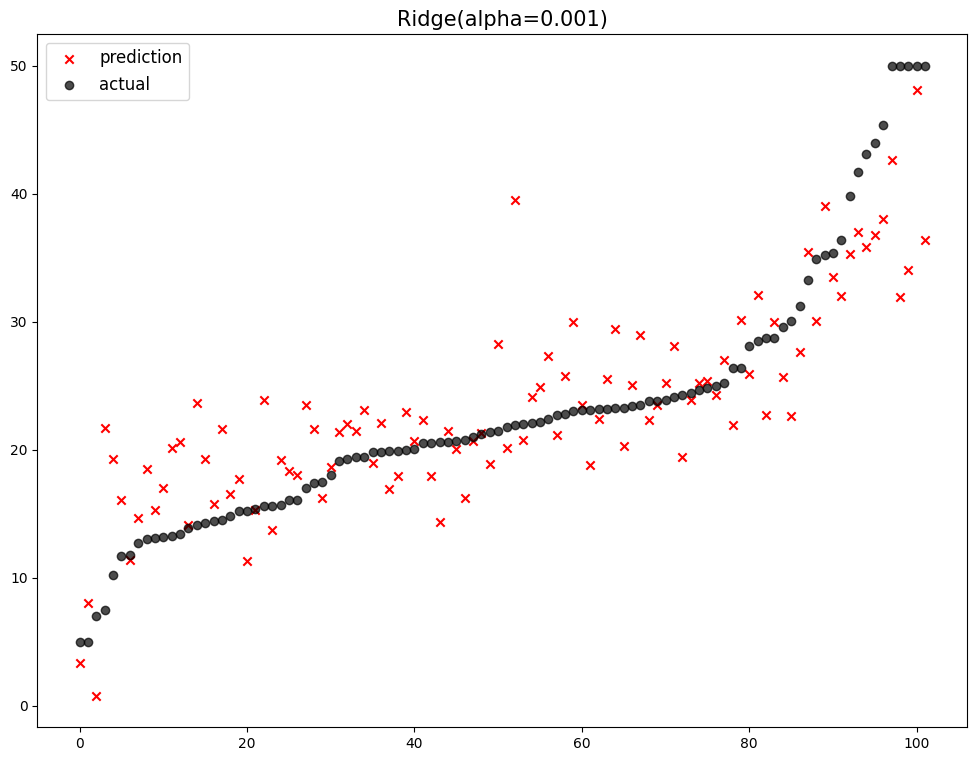

                  model        mse
0      Lasso(alpha=100)  76.902047
1       Lasso(alpha=10)  69.239114
2        Lasso(alpha=1)  30.916750
3      Ridge(alpha=100)  30.446370
4        Ridge(alpha=1)  28.290882
5      Lasso(alpha=0.1)  28.240782
6       Ridge(alpha=10)  28.119283
7      Ridge(alpha=0.1)  28.059207
8      LinearRegression  28.052198
9    Ridge(alpha=0.001)  28.052186
10    Ridge(alpha=0.01)  28.052171
11  Lasso(alpha=0.0001)  28.050781
12   Lasso(alpha=0.001)  28.038362
13    Lasso(alpha=0.01)  27.947338


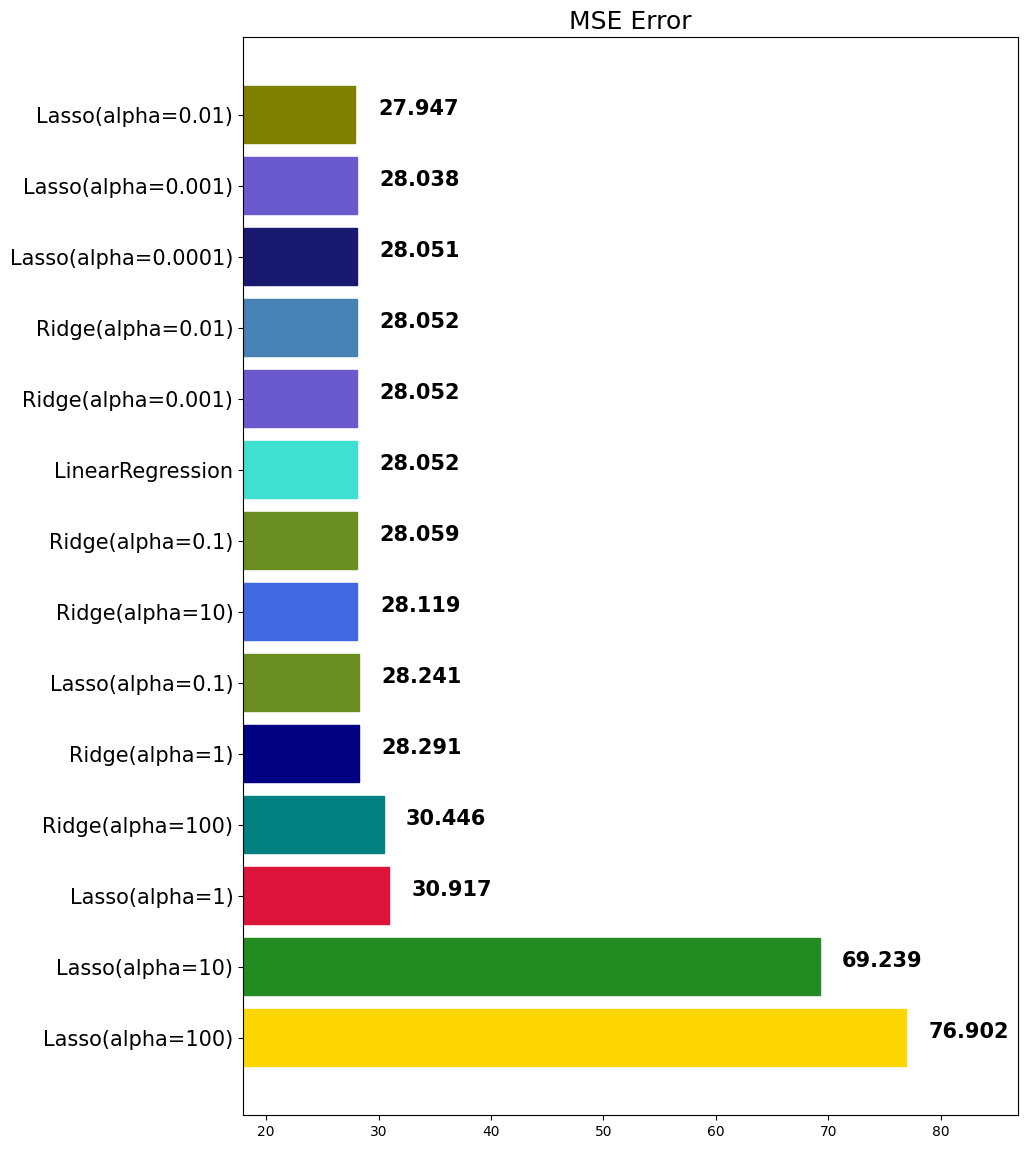

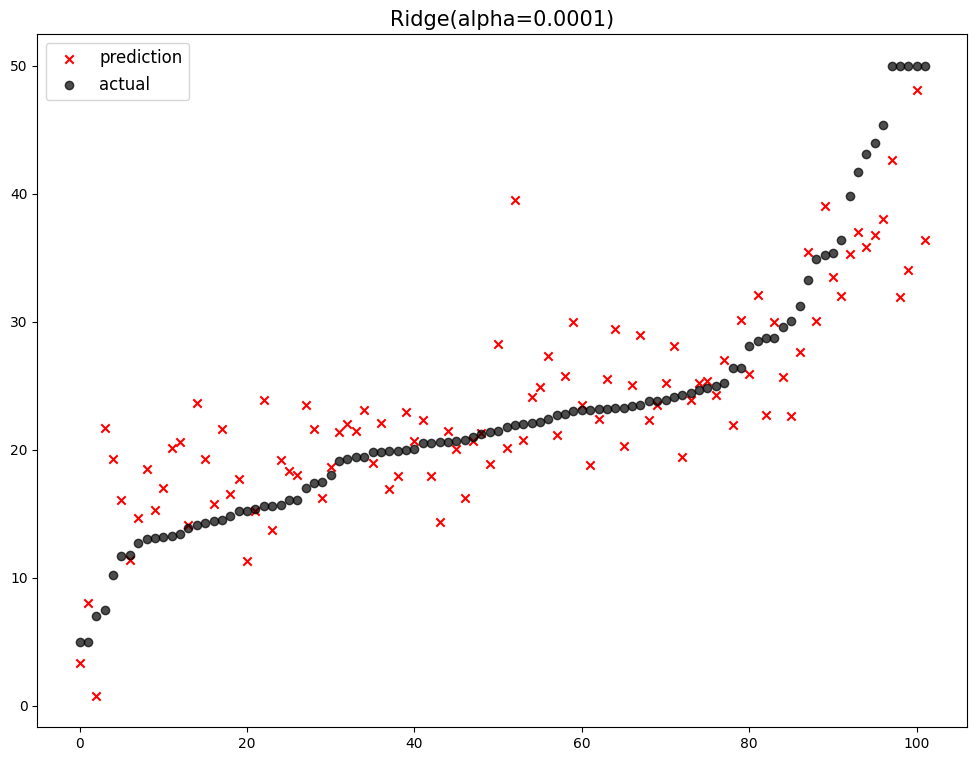

                  model        mse
0      Lasso(alpha=100)  76.902047
1       Lasso(alpha=10)  69.239114
2        Lasso(alpha=1)  30.916750
3      Ridge(alpha=100)  30.446370
4        Ridge(alpha=1)  28.290882
5      Lasso(alpha=0.1)  28.240782
6       Ridge(alpha=10)  28.119283
7      Ridge(alpha=0.1)  28.059207
8      LinearRegression  28.052198
9   Ridge(alpha=0.0001)  28.052197
10   Ridge(alpha=0.001)  28.052186
11    Ridge(alpha=0.01)  28.052171
12  Lasso(alpha=0.0001)  28.050781
13   Lasso(alpha=0.001)  28.038362
14    Lasso(alpha=0.01)  27.947338


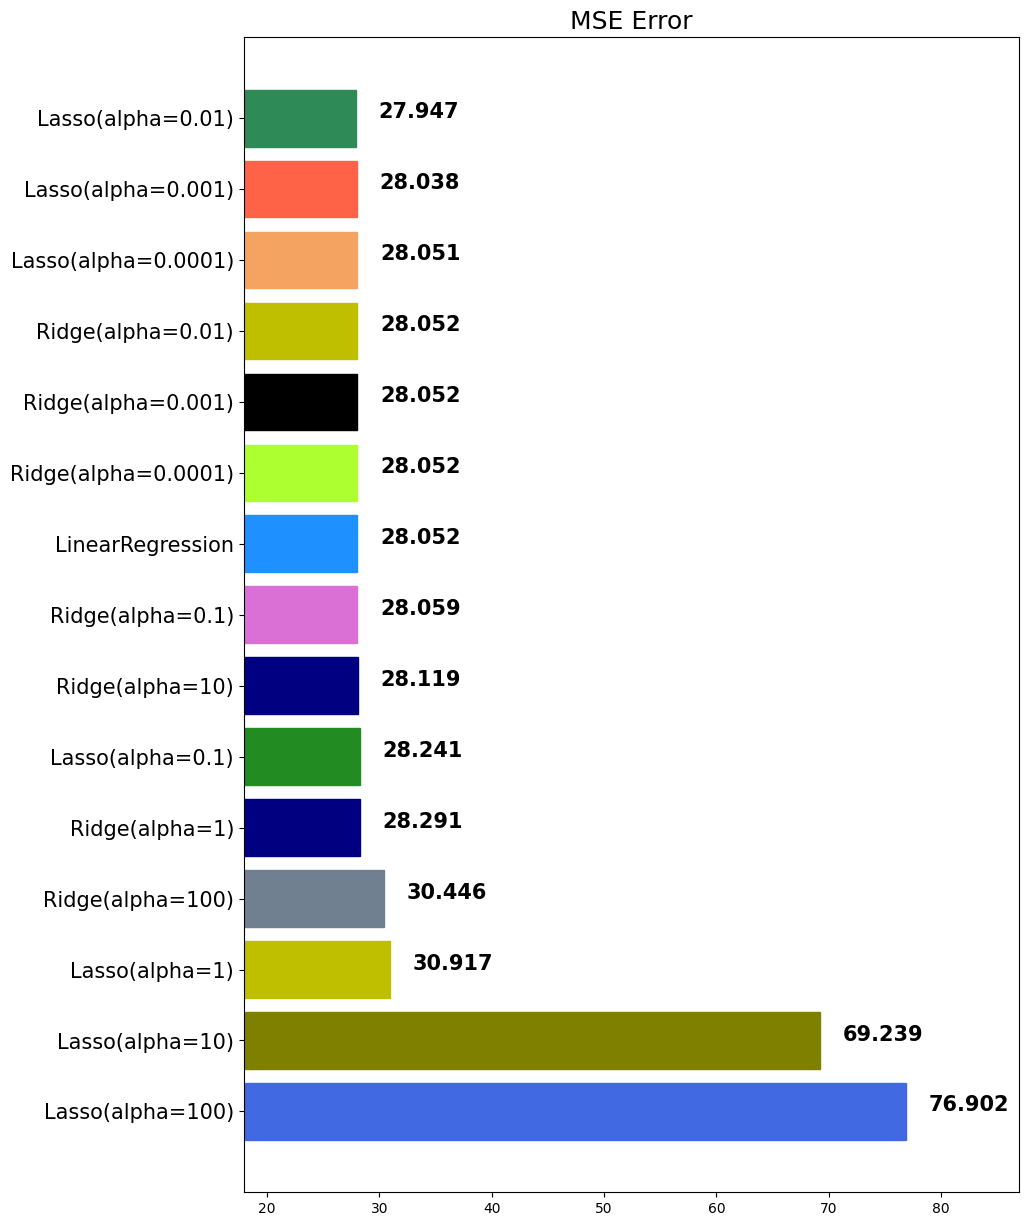

In [ ]:
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train, y_train)
  pred = ridge.predict(x_test)
  mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

> 전반적인 패턴 (alpha가 커질수록 MSE가 커진다)는 비슷하지만 ridge가 조금 더 높은 성능을 가진다

In [ ]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO'],
      dtype='object')

In [ ]:
ridge.coef_

array([ -0.20656541,   0.04040658,  -0.04361992,   5.29737081,
       -22.40311125,   5.82594022,  -0.050706  ,  -1.68069186,
         0.2740687 ,  -0.01138186,  -0.92573676])

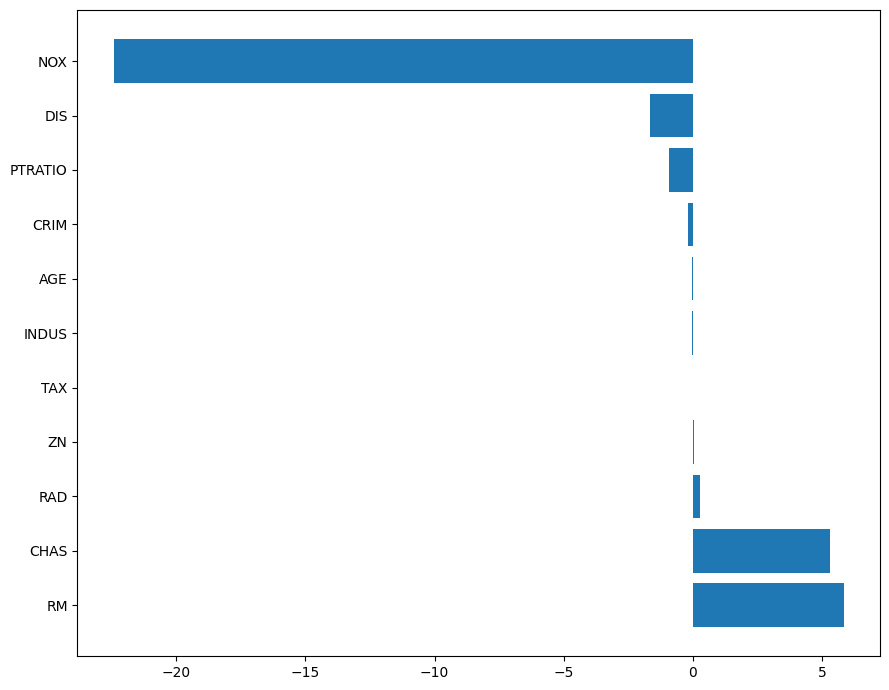

In [ ]:
plot_coef(x_train.columns, ridge.coef_)

In [ ]:
r100 = Ridge(alpha=100)
r100.fit(x_train, y_train)
r100_pred = ridge.predict(x_test)

r001 = Ridge(alpha=0.001)
r001.fit(x_train, y_train)
r001_pred = ridge.predict(x_test)

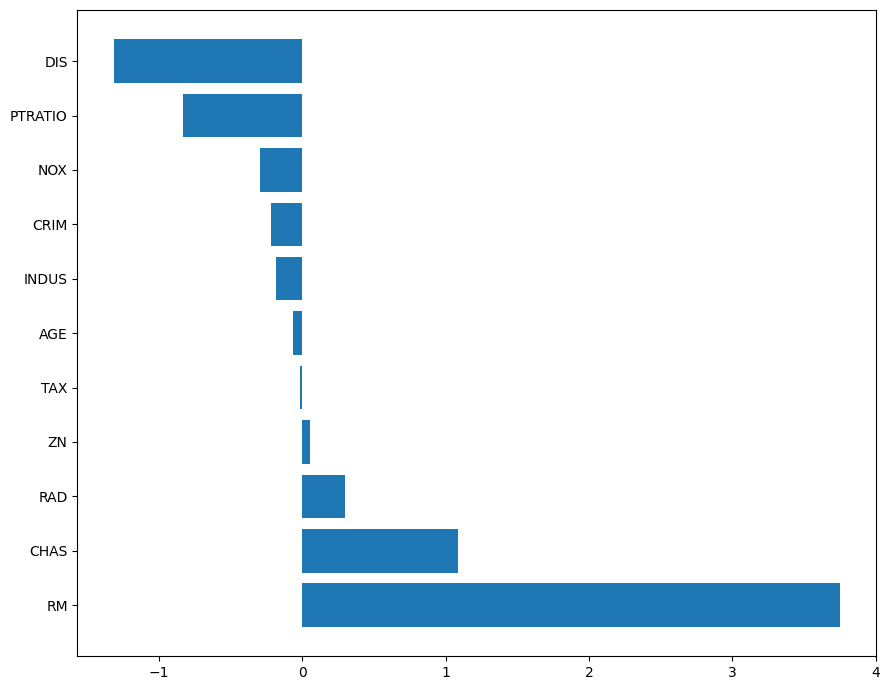

In [ ]:
plot_coef(x_train.columns, r100.coef_)

> Lasso와 차이점은 중요도가 높을수록 coefficient의 weight이 커지지만 작다고해서 거의 소멸을 시켜버리진 않는 모습

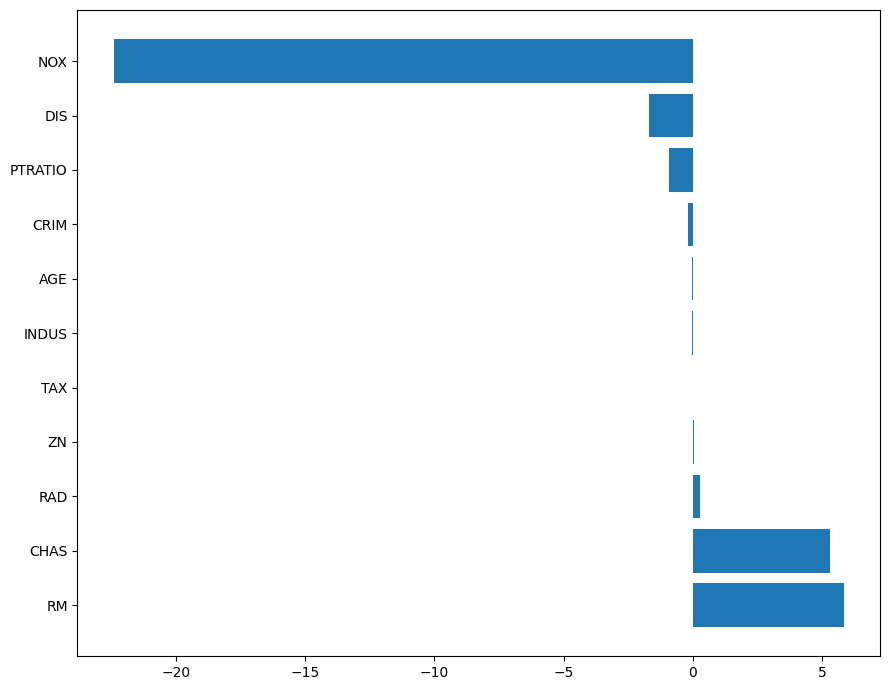

In [ ]:
plot_coef(x_train.columns, r001.coef_)

### 5-5. ElasticNet
* Lasso와 Ridge를 비율로 조합해서 동시에 쓰는 기법
* l1_ratio(default=0.5) 속성
  * l1_ratio = 0  : only use ridge
  * l1_ratio = 1   : only use lasso
  * 0 < l1_ratio < 1   : combine both with ration

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ratios = [0.2, 0.5, 0.8]

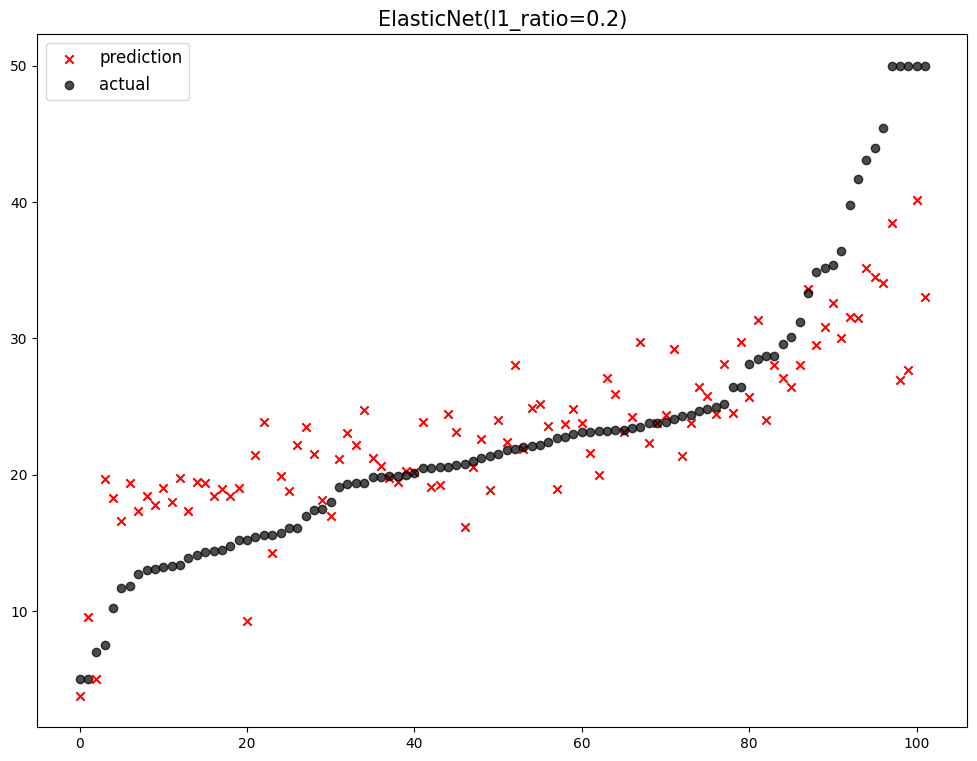

                       model        mse
0           Lasso(alpha=100)  76.902047
1            Lasso(alpha=10)  69.239114
2   ElasticNet(l1_ratio=0.2)  33.254837
3             Lasso(alpha=1)  30.916750
4           Ridge(alpha=100)  30.446370
5             Ridge(alpha=1)  28.290882
6           Lasso(alpha=0.1)  28.240782
7            Ridge(alpha=10)  28.119283
8           Ridge(alpha=0.1)  28.059207
9           LinearRegression  28.052198
10       Ridge(alpha=0.0001)  28.052197
11        Ridge(alpha=0.001)  28.052186
12         Ridge(alpha=0.01)  28.052171
13       Lasso(alpha=0.0001)  28.050781
14        Lasso(alpha=0.001)  28.038362
15         Lasso(alpha=0.01)  27.947338


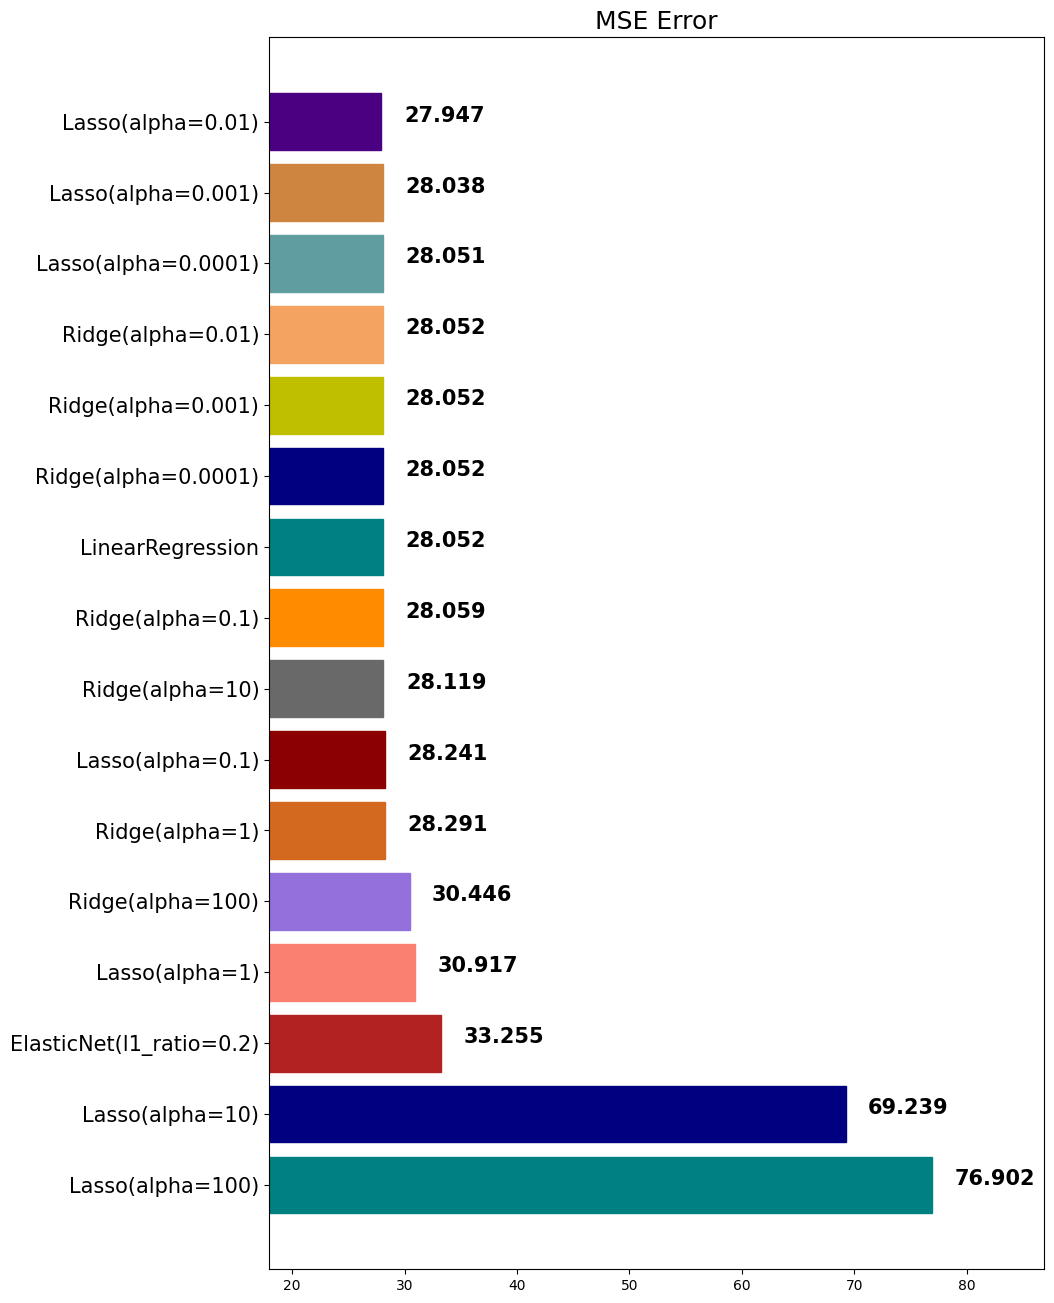

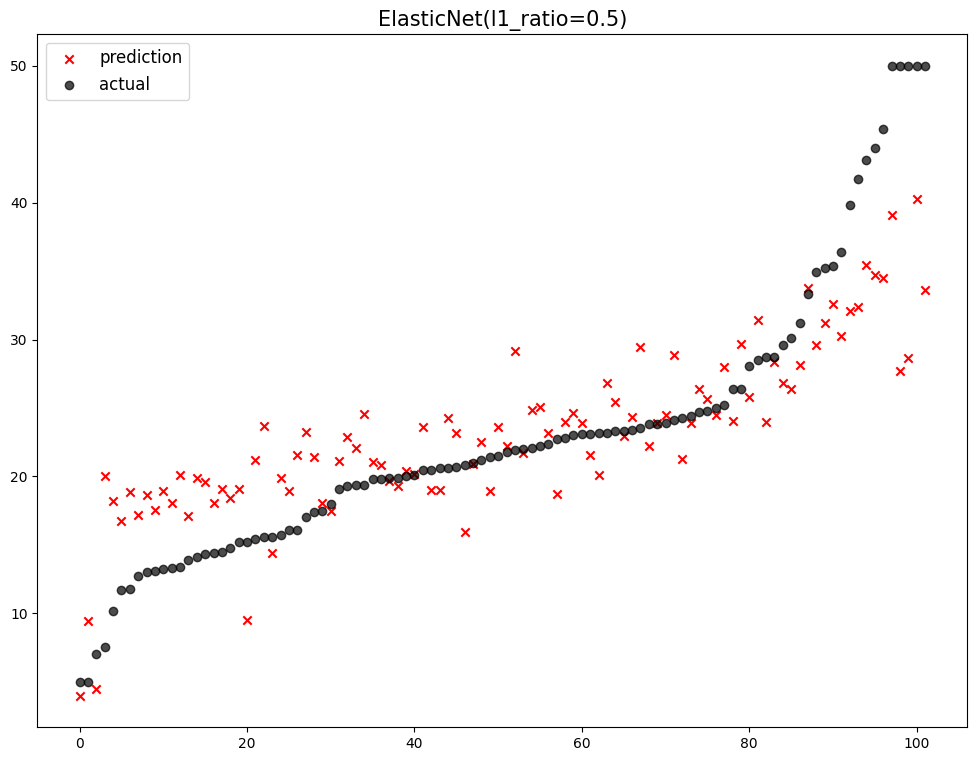

                       model        mse
0           Lasso(alpha=100)  76.902047
1            Lasso(alpha=10)  69.239114
2   ElasticNet(l1_ratio=0.2)  33.254837
3   ElasticNet(l1_ratio=0.5)  31.563498
4             Lasso(alpha=1)  30.916750
5           Ridge(alpha=100)  30.446370
6             Ridge(alpha=1)  28.290882
7           Lasso(alpha=0.1)  28.240782
8            Ridge(alpha=10)  28.119283
9           Ridge(alpha=0.1)  28.059207
10          LinearRegression  28.052198
11       Ridge(alpha=0.0001)  28.052197
12        Ridge(alpha=0.001)  28.052186
13         Ridge(alpha=0.01)  28.052171
14       Lasso(alpha=0.0001)  28.050781
15        Lasso(alpha=0.001)  28.038362
16         Lasso(alpha=0.01)  27.947338


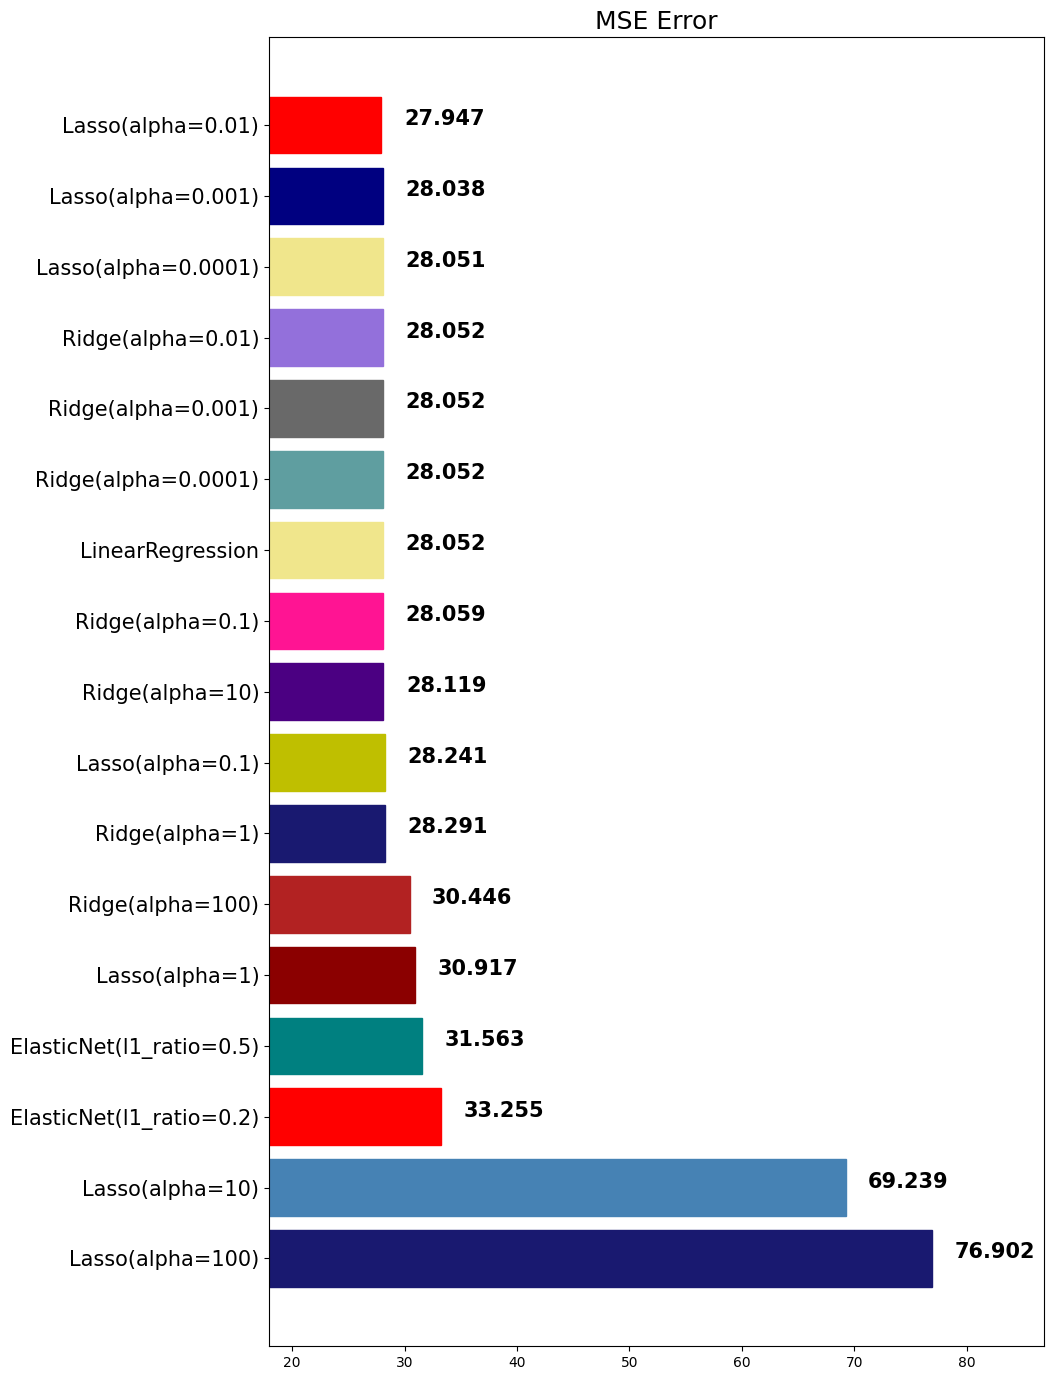

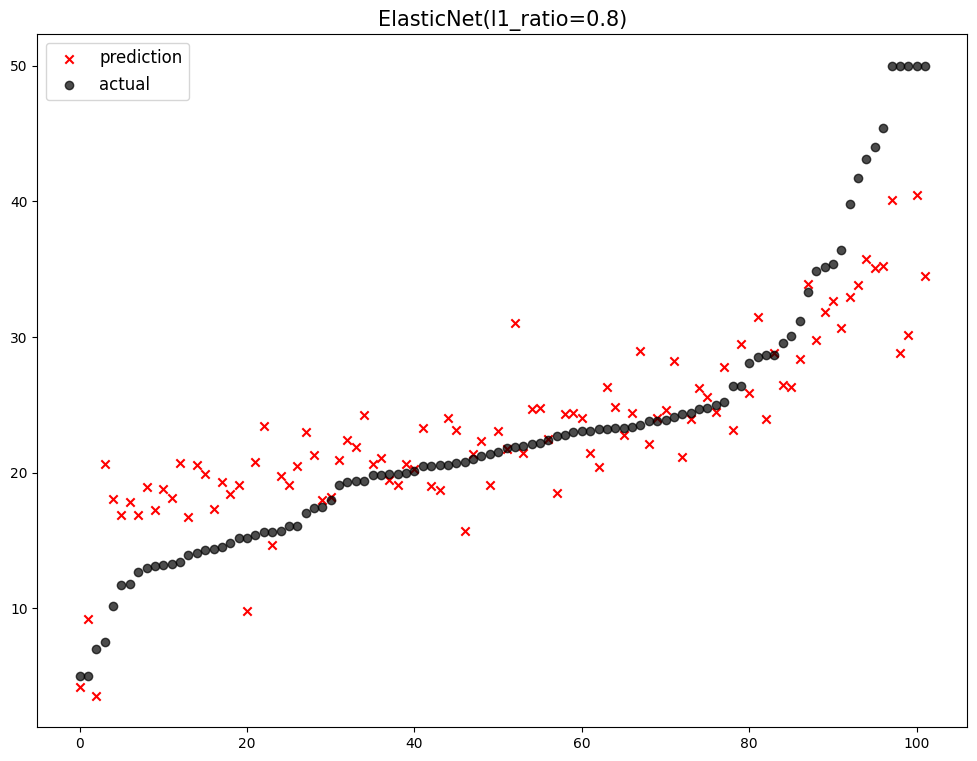

                       model        mse
0           Lasso(alpha=100)  76.902047
1            Lasso(alpha=10)  69.239114
2   ElasticNet(l1_ratio=0.2)  33.254837
3   ElasticNet(l1_ratio=0.5)  31.563498
4             Lasso(alpha=1)  30.916750
5           Ridge(alpha=100)  30.446370
6   ElasticNet(l1_ratio=0.8)  29.185076
7             Ridge(alpha=1)  28.290882
8           Lasso(alpha=0.1)  28.240782
9            Ridge(alpha=10)  28.119283
10          Ridge(alpha=0.1)  28.059207
11          LinearRegression  28.052198
12       Ridge(alpha=0.0001)  28.052197
13        Ridge(alpha=0.001)  28.052186
14         Ridge(alpha=0.01)  28.052171
15       Lasso(alpha=0.0001)  28.050781
16        Lasso(alpha=0.001)  28.038362
17         Lasso(alpha=0.01)  27.947338


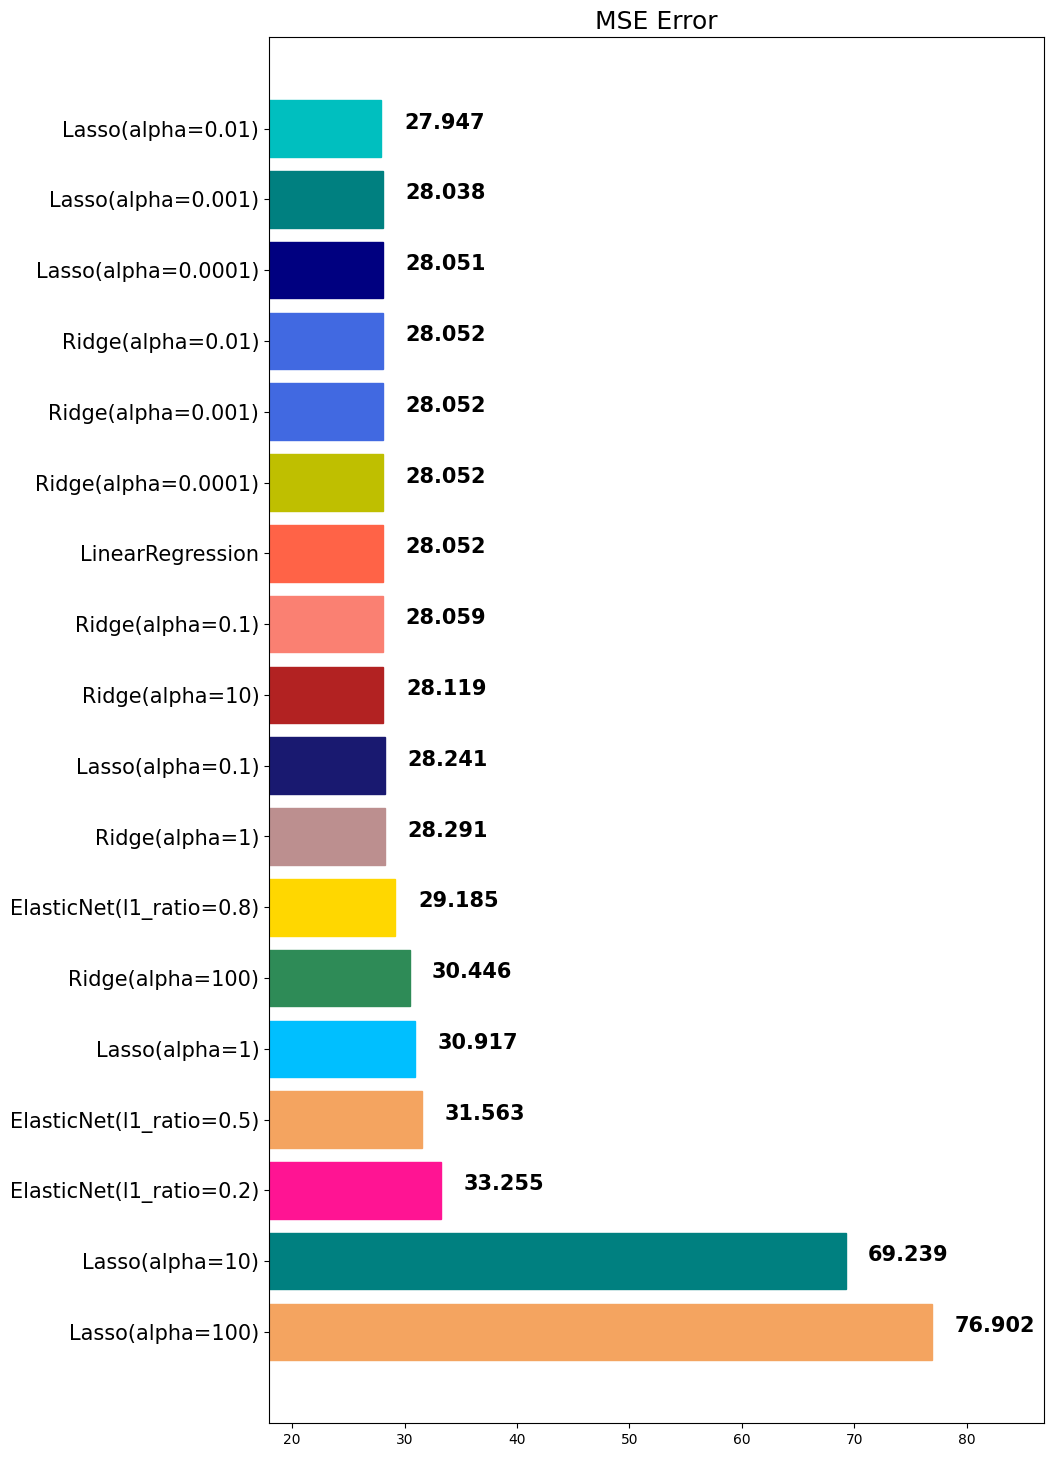

In [ ]:
for ratio in ratios:
  elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio) # weight 강도는 0.5, ratio
  elasticnet.fit(x_train, y_train)
  pred = elasticnet.predict(x_test)
  mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

# 6. 스케일러

* 데이터를 모델링 하기 전에 반드시 스케일링 과정을 거침
* 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우나 언더플로우를 방지하고, 독립 변수의 공분산 행렬의 조건수를 감소 시켜 최적화 과정에서 안정성 및 수렴 속도를 향상

### 6-1. 스케일링의 종류
1. StandardScaler: 기본 스케일. 평균과 표준 편차 사용
2. MinMaxScalar: 최대/최솟값이 각각 1, 0이 되도록 스케일링
3. MaxAbsScaler: 최대절대값과 0이 되도록 스케일링
4. RobustScaler: 중앙값 median과 IQR 사용. 아웃라이어의 영향을 최소화

### 6-2. 정규화 Normalize
* column 간의 다른 min, max 값을 가지고 있는 경우, 정규화를 통해 최솟값/최댓값의 척도를 맞춰주는 것
  * 예) Naver 영화 평정: 1 <= x <= 10, Netflix 1 <= x <= 5
  * 네이버에서의 5점과 넷플에서의 5점이 다름. 그래서 이것의 척도를 맞춰서 variable들의 feature들을 비슷한 수준으로 맞춰줌. 그래야 머신이 비슷하게 읽어드릴 수 있기 때문.
  * 그것이 아니라면, 한쪽으로 쏠림 현상이 일어날 수도 있음.  

In [ ]:
movie = {'naver':[2,4,6,8,10], 'netflix':[1,2,3,4,5]}

In [ ]:
movie = pd.DataFrame(data=movie)
movie

,naver,netflix
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
min_max_movie = min_max_scaler.fit_transform(movie)

In [ ]:
pd.DataFrame(min_max_movie, columns=['naver', 'netflix'])

,naver,netflix
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


### 6-3. 표준화 Standardization
* 표준정규분포의 속정을 갖도록 재조정되는 것
* 평균을 0, 표준편차를 1로 만들어주는 스케일러
* standard binomial distribution, mean(mu) = 0, standard deviaton (sigma) = 1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 콜럼에 대한 통계 정보 (int, float일 경우)
x_train.describe()
# x_train.info()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000
mean,3.743787,11.240099,11.295050,0.061881,0.557240,6.270099,69.37104,3.749745,9.955446,415.811881,18.490347
std,8.477325,22.826632,6.905104,0.241238,0.116708,0.694122,28.20872,2.112983,8.882637,170.669748,2.142314
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,188.000000,12.600000
25%,0.082598,0.000000,5.190000,0.000000,0.449000,5.886500,45.55000,2.019025,4.000000,283.250000,17.400000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.211500,78.50000,3.100900,5.000000,335.000000,19.100000
75%,4.283180,12.500000,18.100000,0.000000,0.635000,6.626000,94.52500,5.118000,24.000000,666.000000,20.200000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.00000,10.710300,24.000000,711.000000,22.000000


In [ ]:
std_scaled = StandardScaler().fit_transform(x_train)

In [ ]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.44,-0.49,-1.57,-0.26,-1.48,-3.91,-2.36,-1.24,-1.01,-1.34,-2.75
25%,-0.43,-0.49,-0.89,-0.26,-0.93,-0.55,-0.85,-0.82,-0.67,-0.78,-0.51
50%,-0.41,-0.49,-0.23,-0.26,-0.17,-0.08,0.32,-0.31,-0.56,-0.47,0.28
75%,0.06,0.06,0.99,-0.26,0.67,0.51,0.89,0.65,1.58,1.47,0.80
max,10.07,3.89,2.38,3.89,2.69,3.54,1.09,3.30,1.58,1.73,1.64


### 6-4. RobustScaler
* 중앙값이 0, IQR이 1이 되도록 반환
* outlier 값 처리에 유용

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [ ]:
round(pd.DataFrame(robust_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.83,0.90,0.12,0.06,0.10,0.08,-0.19,0.21,0.25,0.21,-0.22
std,2.02,1.83,0.53,0.24,0.63,0.94,0.58,0.68,0.44,0.45,0.77
min,-0.06,0.00,-0.71,0.00,-0.82,-3.58,-1.54,-0.64,-0.20,-0.38,-2.32
25%,-0.04,0.00,-0.35,0.00,-0.48,-0.44,-0.67,-0.35,-0.05,-0.14,-0.61
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
75%,0.96,1.00,0.65,0.00,0.52,0.56,0.33,0.65,0.95,0.86,0.39
max,21.12,8.00,1.40,1.00,1.79,3.40,0.44,2.46,0.95,0.98,1.04


# 7. Pipeline

* 데이터 전처리에서 학습까지의 과정을 하나로 연결해주는 것

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# for this case, 두개의 객체 StandardScaler()랑 ElasticNet()를 묶어버림
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [ ]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

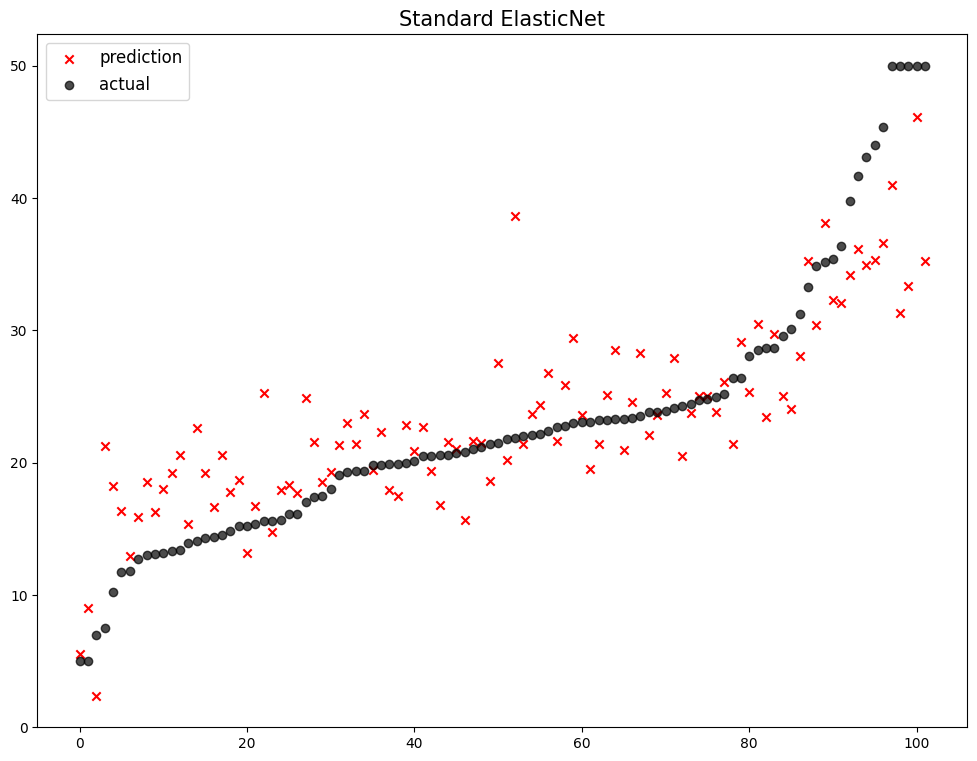

                       model        mse
0           Lasso(alpha=100)  76.902047
1            Lasso(alpha=10)  69.239114
2   ElasticNet(l1_ratio=0.2)  33.254837
3   ElasticNet(l1_ratio=0.5)  31.563498
4             Lasso(alpha=1)  30.916750
5           Ridge(alpha=100)  30.446370
6   ElasticNet(l1_ratio=0.8)  29.185076
7        Standard ElasticNet  28.308850
8             Ridge(alpha=1)  28.290882
9           Lasso(alpha=0.1)  28.240782
10           Ridge(alpha=10)  28.119283
11          Ridge(alpha=0.1)  28.059207
12          LinearRegression  28.052198
13       Ridge(alpha=0.0001)  28.052197
14        Ridge(alpha=0.001)  28.052186
15         Ridge(alpha=0.01)  28.052171
16       Lasso(alpha=0.0001)  28.050781
17        Lasso(alpha=0.001)  28.038362
18         Lasso(alpha=0.01)  27.947338


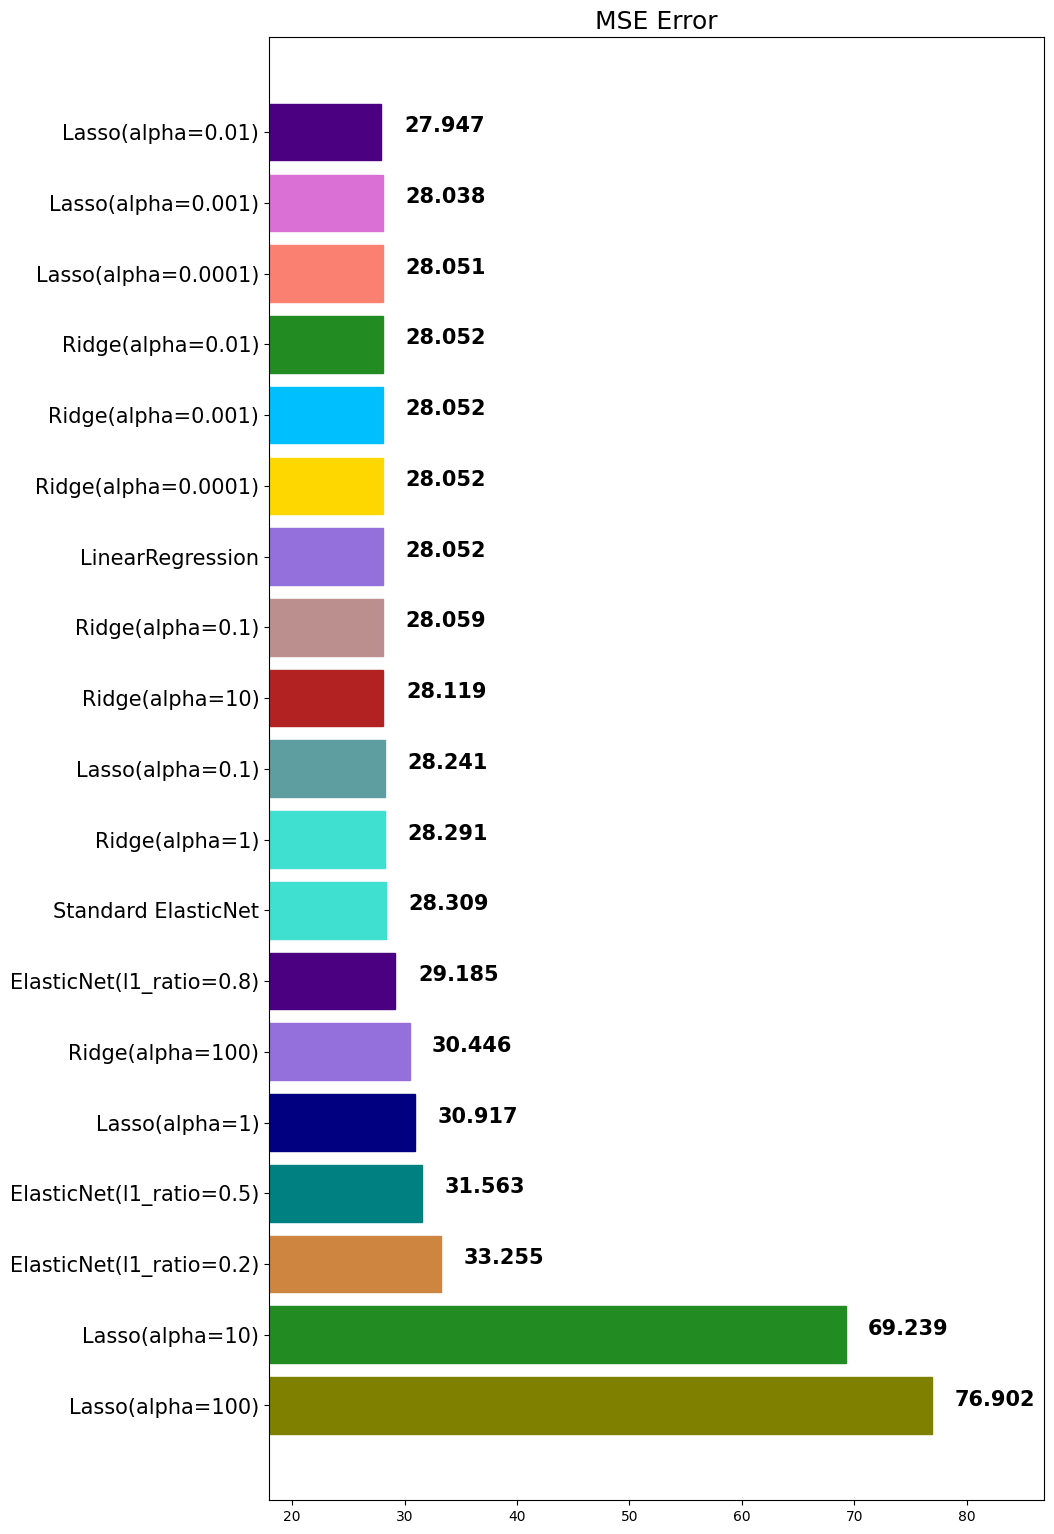

In [ ]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

# 8. 다항회귀 Polynomial Regression

* [다큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)
* 다항식의 계수간 상호작용을 통해 새로운 feature를 생성
* feature마다 가중치 weight가 다름 -> 만약 feature에 weight가 쏠리기 된다면, few features들의 의존도가 높아짐 -> 그것을 방지하기 위해, few features들의 가중치를 높힌 후 그것들을 따로 빼서 새로운 feature들을 만듬 -> 연산량은 많아지면서 정확도는 올라감
* 데이터가 단순한 직선의 형태가 아닌 비선형 형태여도 선형 모델을 사용하여 빈선형 데이터를 학습할 수 있음
* 특성의 거듭제곱을 새로운 특성으로 추가하고 확장된 특성을 포함한 데이터셋에 선형 모델을 학습

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# degree는 얼마정도의 가중치를 줄 것인가
# 가장 높은 가중치 feature 두개를 뽑아서 새로운 feature 두개를 생성하는 뜻
# include_bias = False: 0차항 배제
# include_bias = True: 0차항 포함
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
poly_features = poly.fit_transform(x_train)
poly_features

array([[     1.     ,      0.08447,      0.     , ...,  87616.     ,
          4913.6    ,    275.56   ],
       [     1.     ,      0.14103,      0.     , ...,  83521.     ,
          4624.     ,    256.     ],
       [     1.     ,     11.1081 ,      0.     , ..., 443556.     ,
         13453.2    ,    408.04   ],
       ...,
       [     1.     ,      3.69311,      0.     , ..., 443556.     ,
         13453.2    ,    408.04   ],
       [     1.     ,      0.5405 ,     20.     , ...,  69696.     ,
          3432.     ,    169.     ],
       [     1.     ,      0.11132,      0.     , ..., 505521.     ,
         14291.1    ,    404.01   ]])

In [ ]:
x_train.iloc[0]

CRIM         0.08447
ZN           0.00000
INDUS        4.05000
CHAS         0.00000
NOX          0.51000
RM           5.85900
AGE         68.70000
DIS          2.70190
RAD          5.00000
TAX        296.00000
PTRATIO     16.60000
Name: 348, dtype: float64

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [ ]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

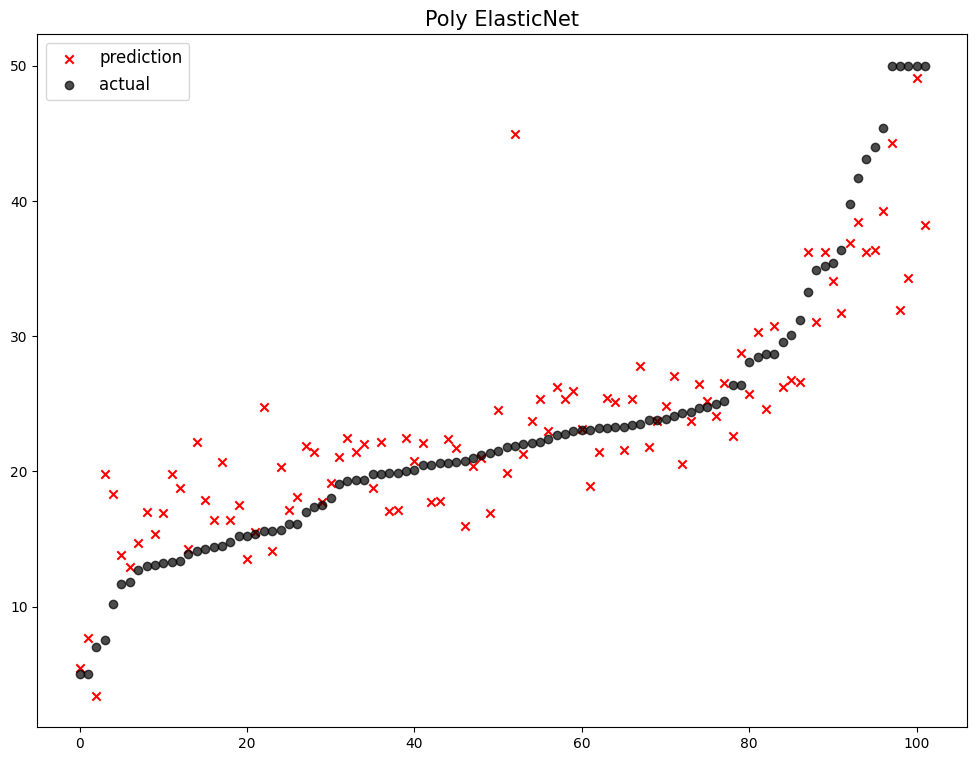

                       model        mse
0           Lasso(alpha=100)  76.902047
1            Lasso(alpha=10)  69.239114
2   ElasticNet(l1_ratio=0.2)  33.254837
3   ElasticNet(l1_ratio=0.5)  31.563498
4             Lasso(alpha=1)  30.916750
5           Ridge(alpha=100)  30.446370
6   ElasticNet(l1_ratio=0.8)  29.185076
7        Standard ElasticNet  28.308850
8             Ridge(alpha=1)  28.290882
9           Lasso(alpha=0.1)  28.240782
10           Ridge(alpha=10)  28.119283
11          Ridge(alpha=0.1)  28.059207
12          LinearRegression  28.052198
13       Ridge(alpha=0.0001)  28.052197
14        Ridge(alpha=0.001)  28.052186
15         Ridge(alpha=0.01)  28.052171
16       Lasso(alpha=0.0001)  28.050781
17        Lasso(alpha=0.001)  28.038362
18         Lasso(alpha=0.01)  27.947338
19           Poly ElasticNet  24.292387


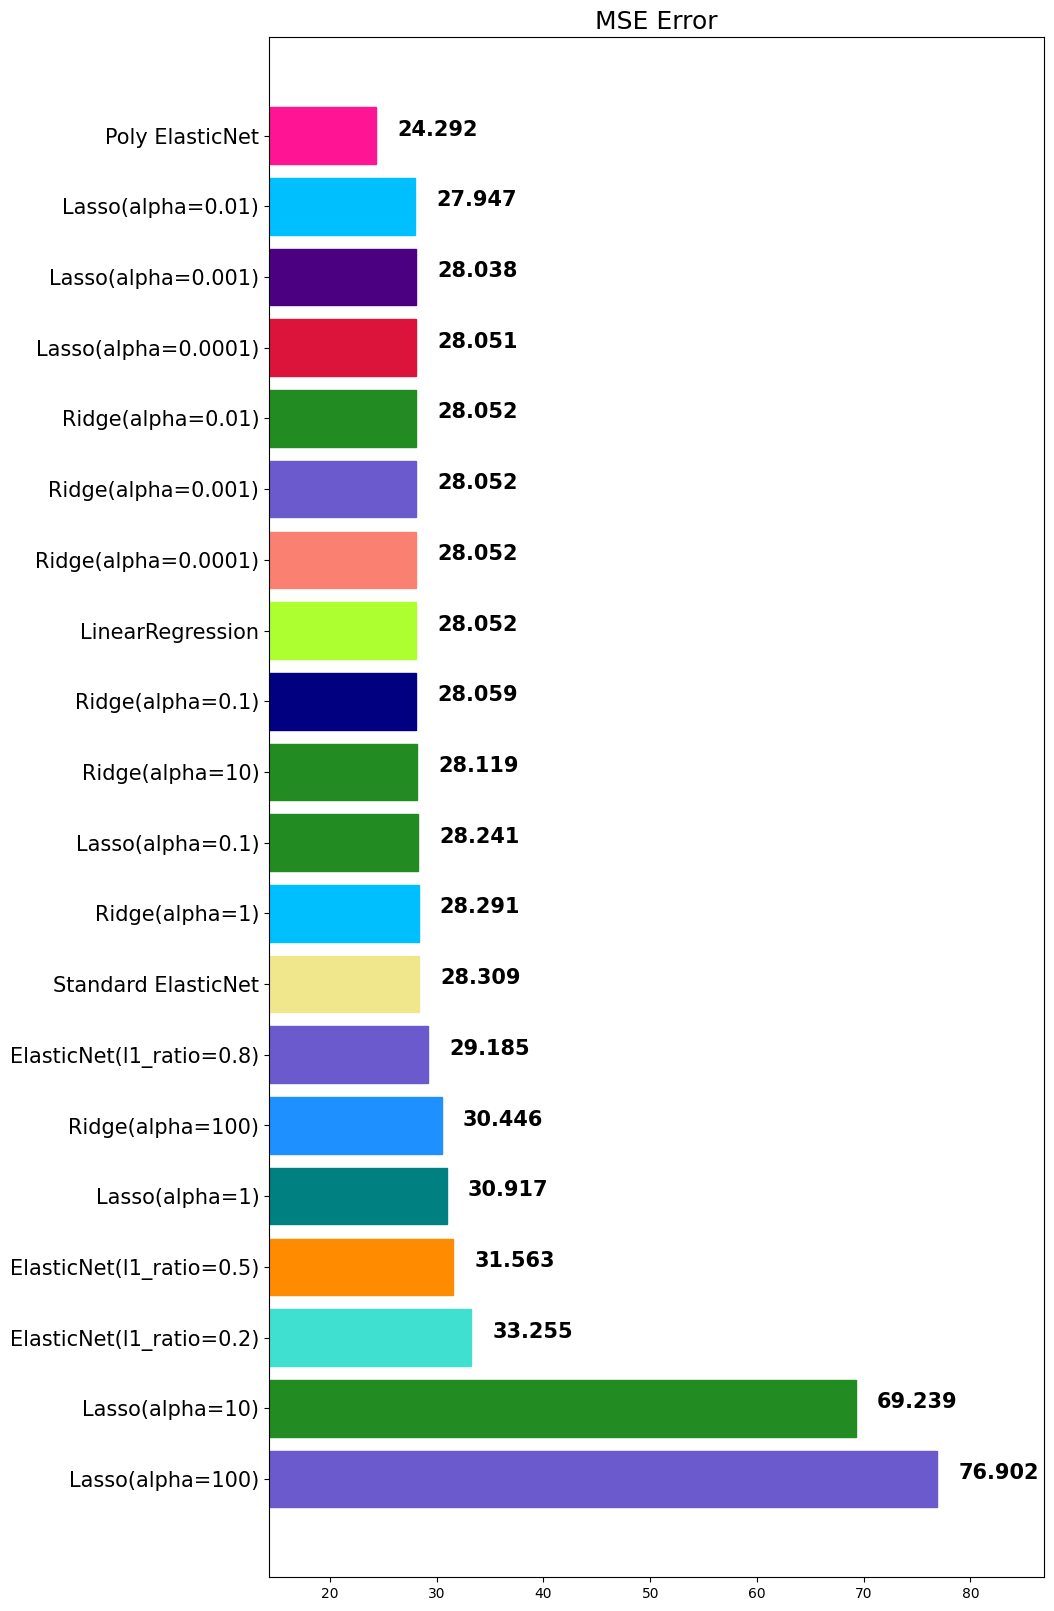

In [ ]:
mse_eval('Poly ElasticNet', poly_pred, y_test)

> mse가 줄었지만 이경우는 overfitting보단 성능이 좋아졌다고 봐야함 > 연산량이 늘었고, 규제를 주었기 때문